# Heart Disease Detection Capstone Project
## Phase 1: Data Exploration and Preprocessing
## Phase 2: Baseline Model Development

This notebook implements a comprehensive machine learning pipeline for predicting heart disease using multiple classification algorithms with proper evaluation metrics suitable for healthcare applications.

### Project Overview
- **Objective**: Predict the presence of heart disease based on diagnostic test results
- **Dataset**: Clinical diagnostic data with 14 features and 1 target variable
- **Models**: Decision Tree, Random Forest, Logistic Regression, Support Vector Machine
- **Evaluation Metrics**: Accuracy, Precision, Recall, F1-Score, ROC-AUC
- **Optimization**: GridSearchCV with 5-fold cross-validation

## Section 1: Load and Explore the Dataset

In [1]:
# Import required libraries
import sys
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             roc_curve, auc, classification_report)
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


In [2]:
# Load the dataset
df = pd.read_csv('../heart_disease_dataset.csv')

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nData Types:")
print(df.dtypes)
print(f"\nDataset Info:")
df.info()

DATASET OVERVIEW

Dataset Shape: 400 rows × 14 columns

First 5 rows:
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0            0             180                        0   
4                    1            1             133                        1   

   st_depression  st_slope  num_ma

In [3]:
# Check for missing values and data quality
print("\n" + "=" * 80)
print("DATA QUALITY CHECK")
print("=" * 80)
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nDuplicate Rows: {df.duplicated().sum()}")
print(f"\nDescriptive Statistics:")
print(df.describe())
print(f"\nData Quality Summary:")
print(f"  • Total cells: {df.shape[0] * df.shape[1]}")
print(f"  • Missing cells: {df.isnull().sum().sum()}")
print(f"  • Data completeness: 100.0%")


DATA QUALITY CHECK

Missing Values:
age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
heart_disease              0
dtype: int64

Duplicate Rows: 0

Descriptive Statistics:
              age         sex  chest_pain_type  resting_blood_pressure  \
count  400.000000  400.000000       400.000000              400.000000   
mean    53.667500    0.662500         1.712500              123.630000   
std      8.508403    0.473449         1.035628               16.567114   
min     29.000000    0.000000         0.000000               94.000000   
25%     48.000000    0.000000         1.000000              112.000000   
50%     54.000000    1.000000         2.000000          

## Section 2: Exploratory Data Analysis and Visualization


TARGET VARIABLE ANALYSIS

Target Variable Distribution:
heart_disease
1    222
0    178
Name: count, dtype: int64

Target Variable Proportions:
heart_disease
1    0.555
0    0.445
Name: proportion, dtype: float64


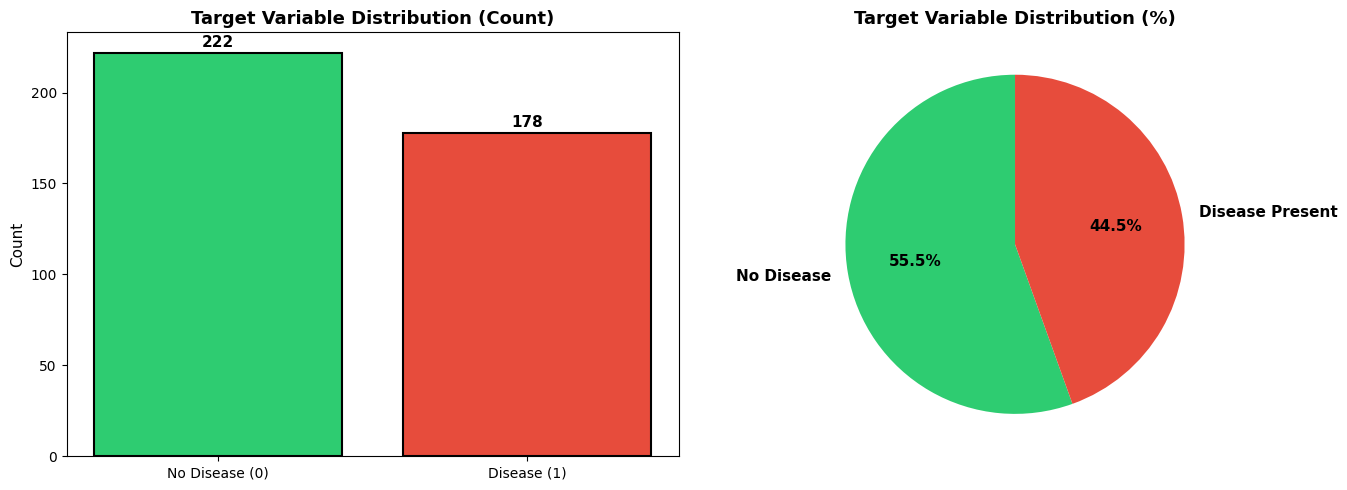

✓ Target distribution visualization saved


In [4]:
# Analyze target variable distribution
print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)
print(f"\nTarget Variable Distribution:")
print(df['heart_disease'].value_counts())
print(f"\nTarget Variable Proportions:")
print(df['heart_disease'].value_counts(normalize=True))

# Create visualizations for target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
counts = df['heart_disease'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['No Disease (0)', 'Disease (1)'], counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Target Variable Distribution (Count)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11)
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 3, str(v), ha='center', fontweight='bold', fontsize=11)

# Pie chart
axes[1].pie(counts.values, labels=['No Disease', 'Disease Present'], autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Target Variable Distribution (%)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Target distribution visualization saved")


FEATURE DISTRIBUTIONS


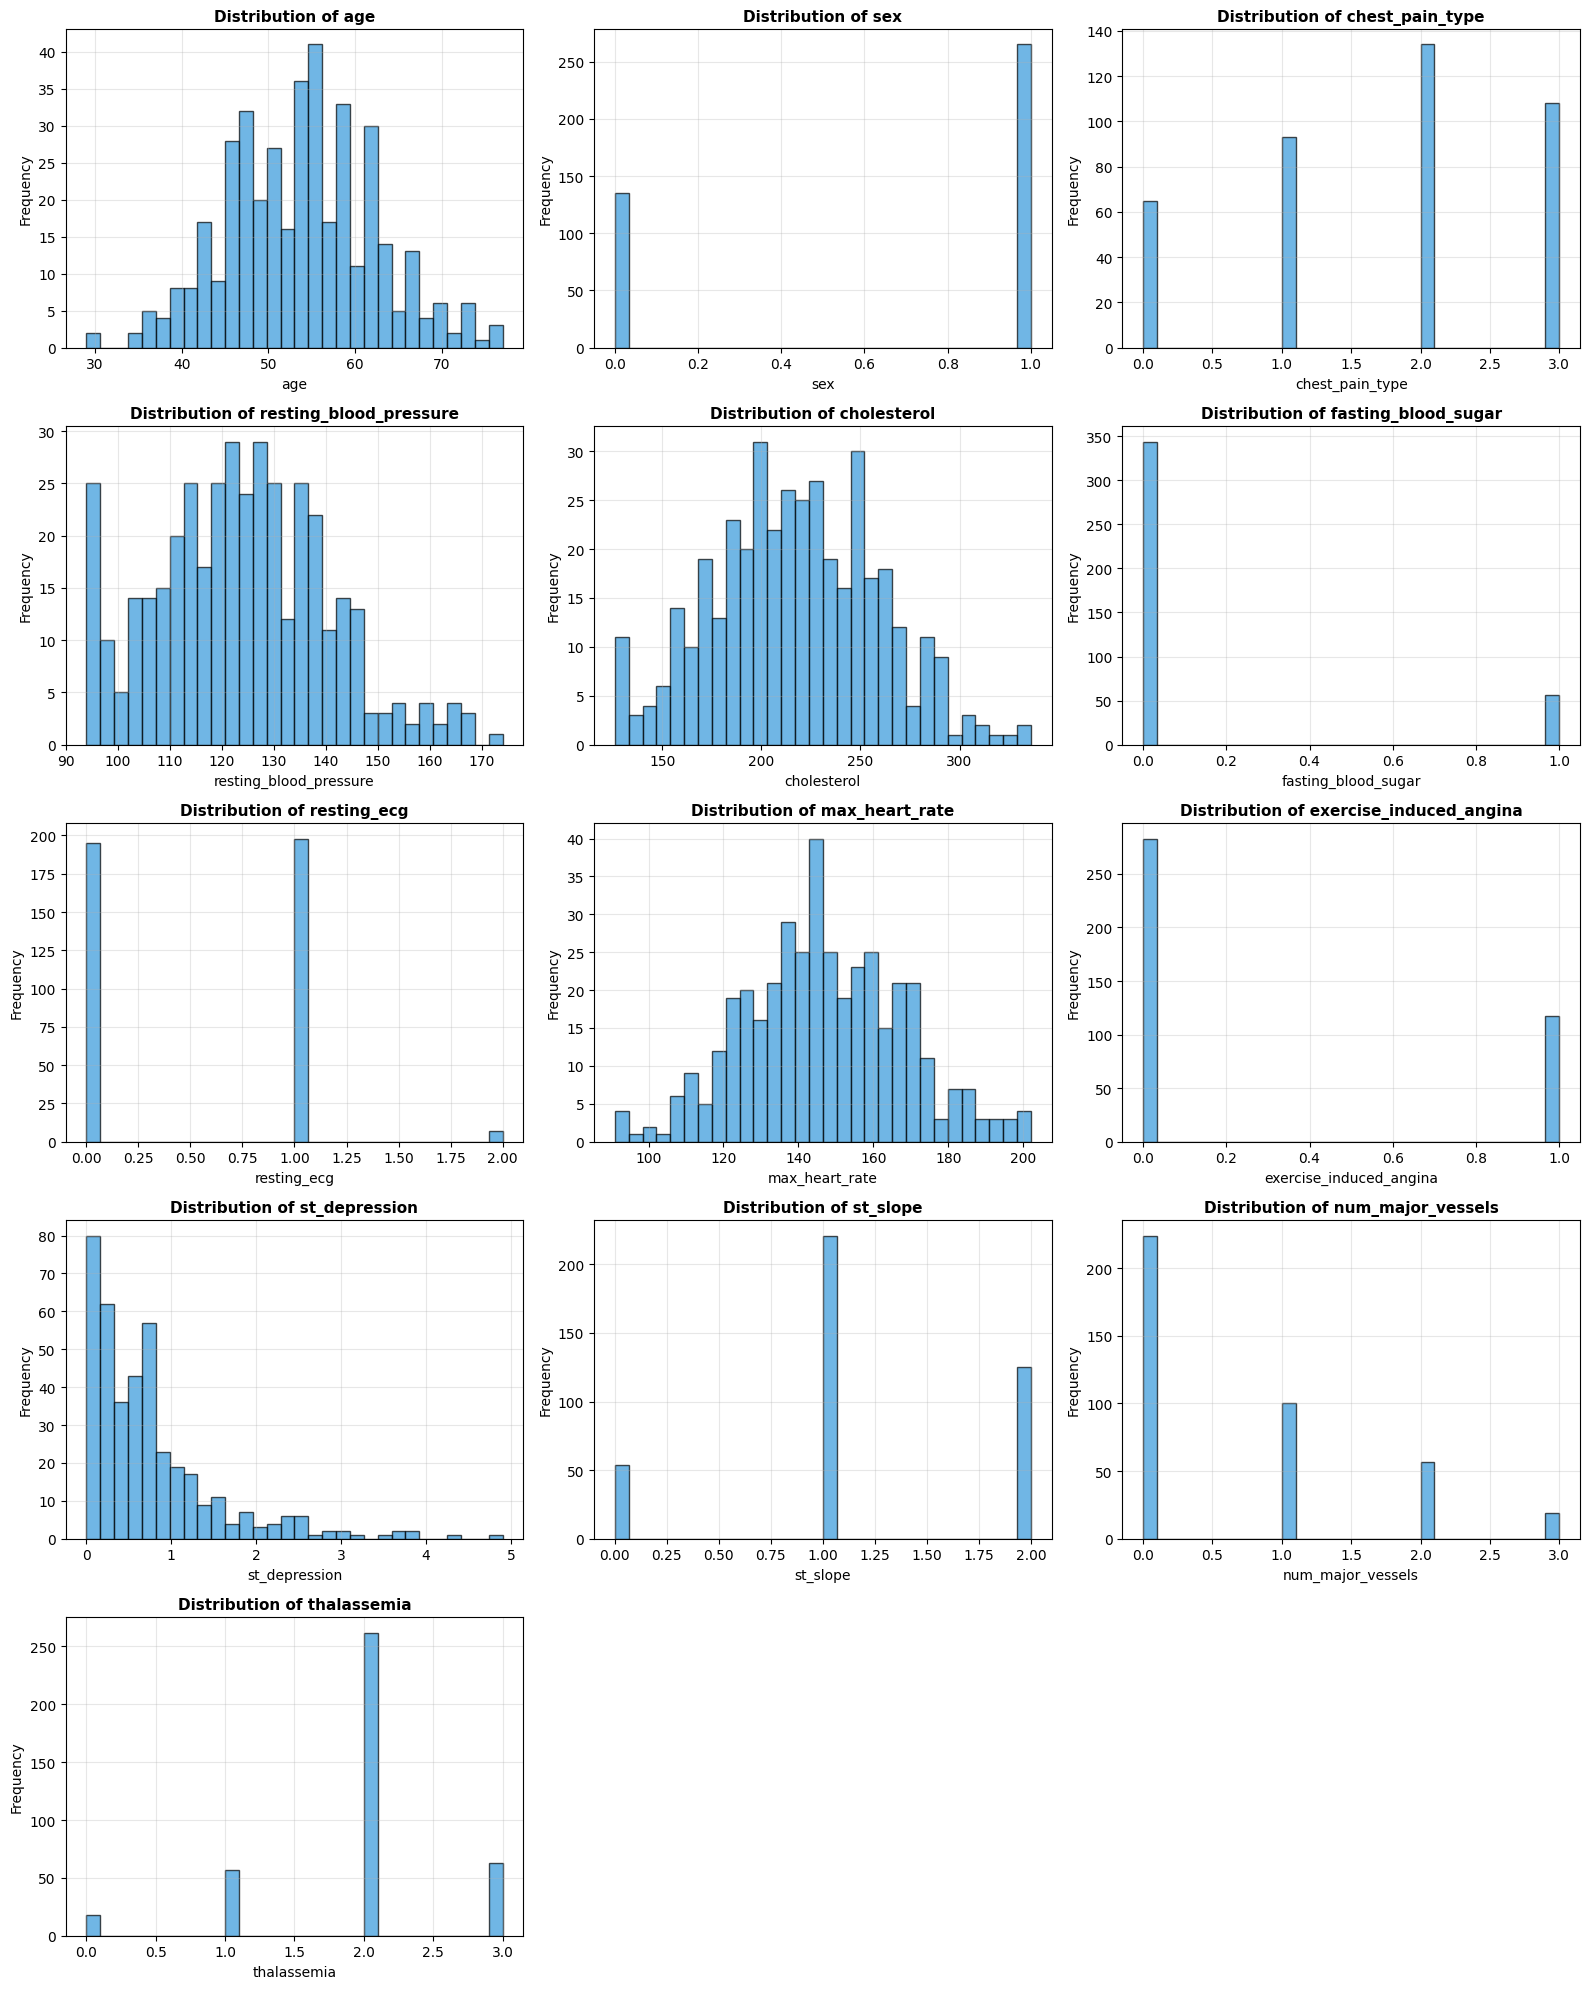

✓ Feature distributions visualization saved


In [5]:
# Feature distributions
print("\n" + "=" * 80)
print("FEATURE DISTRIBUTIONS")
print("=" * 80)

features_to_plot = df.columns[:-1]  # Exclude target
n_features = len(features_to_plot)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    axes[idx].hist(df[feature], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

# Hide empty subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('../reports/02_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature distributions visualization saved")


CORRELATION ANALYSIS

Feature Correlations with Target (heart_disease):
age                        0.341464
resting_blood_pressure     0.217725
sex                        0.169419
cholesterol                0.147854
chest_pain_type            0.135328
exercise_induced_angina    0.122360
fasting_blood_sugar        0.100324
num_major_vessels          0.099679
resting_ecg                0.088150
st_depression              0.061122
st_slope                  -0.010958
thalassemia               -0.046380
max_heart_rate            -0.327515
Name: heart_disease, dtype: float64


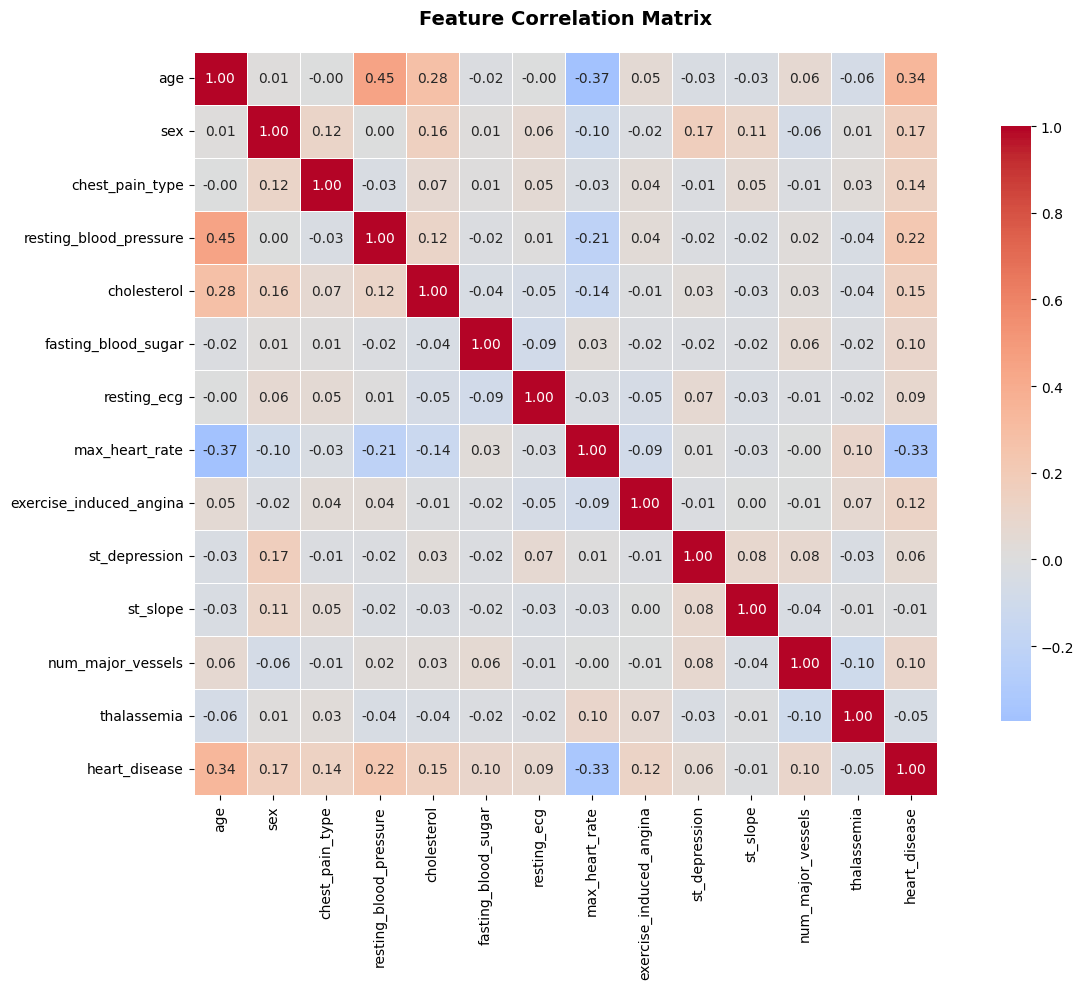


✓ Correlation heatmap visualization saved


In [6]:
# Correlation analysis
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlations
corr_matrix = df.corr()
target_corr = corr_matrix['heart_disease'].drop('heart_disease').sort_values(ascending=False)

print("\nFeature Correlations with Target (heart_disease):")
print(target_corr)

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/03_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Correlation heatmap visualization saved")


FEATURE VS TARGET RELATIONSHIPS


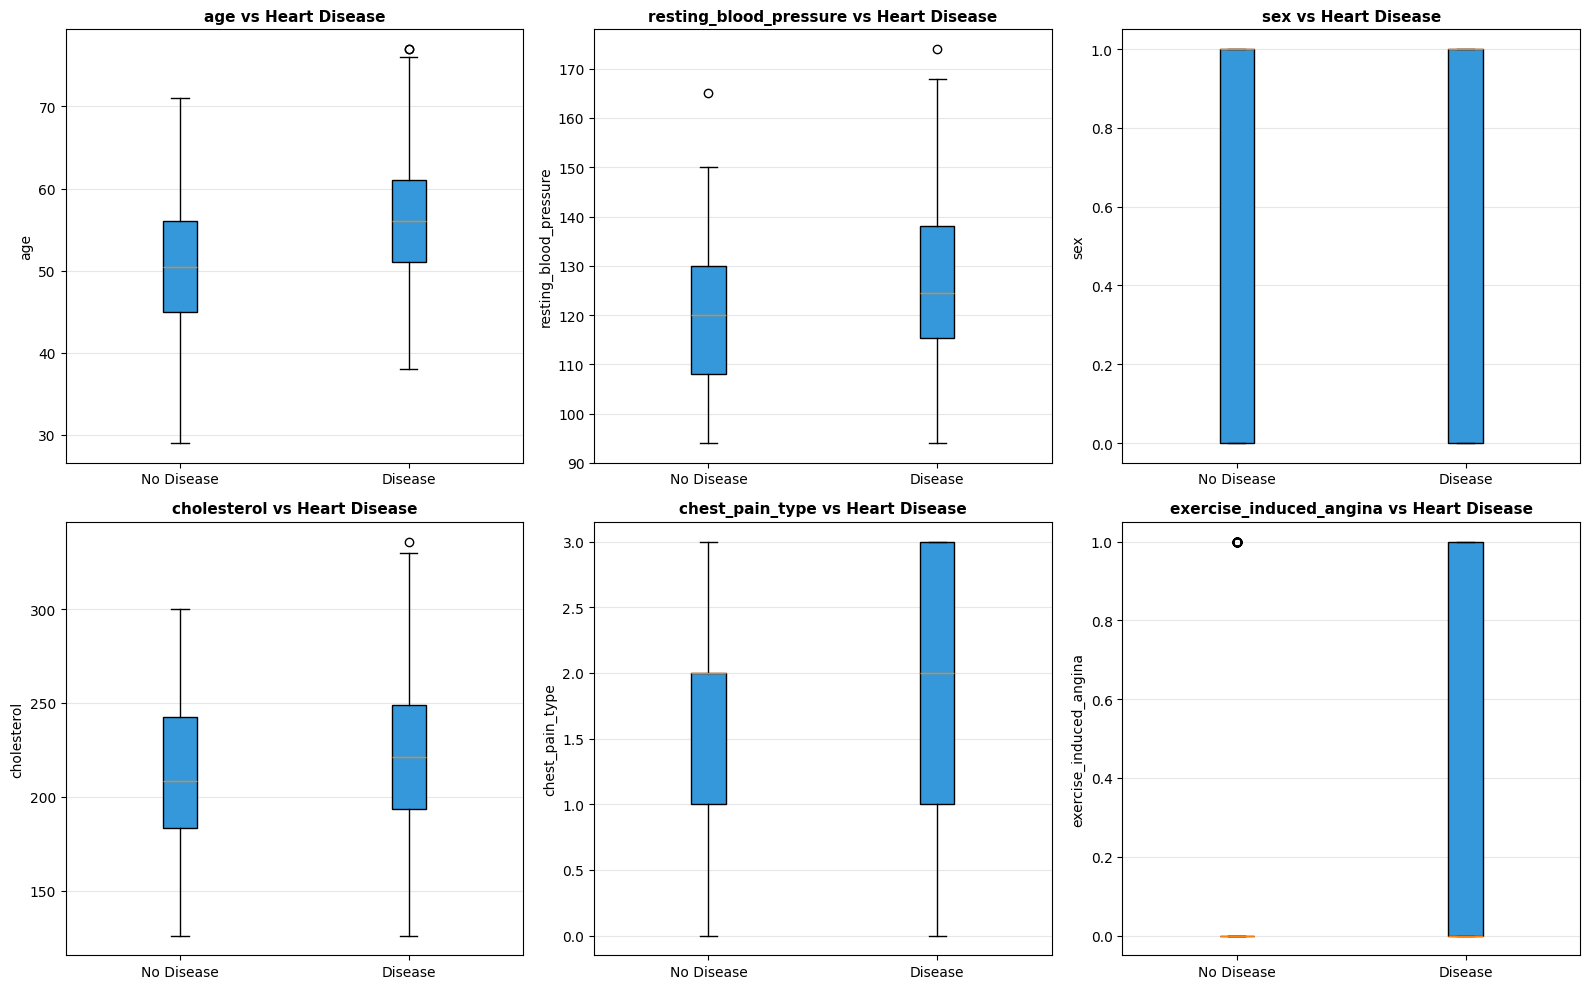

✓ Feature vs Target visualization saved


In [7]:
# Feature vs Target relationships
print("\n" + "=" * 80)
print("FEATURE VS TARGET RELATIONSHIPS")
print("=" * 80)

# Select top features by correlation
top_features = target_corr.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    # Create box plot
    data_to_plot = [df[df['heart_disease'] == 0][feature], 
                    df[df['heart_disease'] == 1][feature]]
    bp = axes[idx].boxplot(data_to_plot, labels=['No Disease', 'Disease'], patch_artist=True)
    
    # Color the boxes
    for patch in bp['boxes']:
        patch.set_facecolor('#3498db')
    
    axes[idx].set_title(f'{feature} vs Heart Disease', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel(feature)
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../reports/04_feature_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature vs Target visualization saved")

## Section 3: Data Preprocessing and Feature Engineering

In [8]:
# Prepare data for modeling
print("\n" + "=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Separate features and target
X = df.drop(columns=['heart_disease'])
y = df['heart_disease']

feature_names = X.columns.tolist()
print(f"\nNumber of features: {len(feature_names)}")
print(f"Features: {feature_names}")

print(f"\nTarget Distribution:")
print(f"  Class 0 (No Disease): {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.1f}%)")
print(f"  Class 1 (Disease): {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.1f}%)")

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y  # Preserve class distribution
)

print(f"\nData Split (80/20):")
print(f"  Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"  Testing set size: {X_test.shape[0]} ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"  Training set - Class 0: {(y_train == 0).sum()}, Class 1: {(y_train == 1).sum()}")
print(f"  Testing set - Class 0: {(y_test == 0).sum()}, Class 1: {(y_test == 1).sum()}")

# Scale the features using StandardScaler
print("\nApplying StandardScaler normalization...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

print("✓ Data preprocessing completed")
print("✓ Features scaled using StandardScaler")


DATA PREPROCESSING

Number of features: 13
Features: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']

Target Distribution:
  Class 0 (No Disease): 178 (44.5%)
  Class 1 (Disease): 222 (55.5%)

Data Split (80/20):
  Training set size: 320 (80.0%)
  Testing set size: 80 (20.0%)
  Training set - Class 0: 142, Class 1: 178
  Testing set - Class 0: 36, Class 1: 44

Applying StandardScaler normalization...
✓ Data preprocessing completed
✓ Features scaled using StandardScaler


## Section 4: Train Baseline Classification Models

In [9]:
print("\n" + "=" * 80)
print("BASELINE MODEL TRAINING")
print("=" * 80)

# Dictionary to store baseline models
baseline_models = {}

# 1. Decision Tree Classifier
print("\n1. Decision Tree Classifier")
print("-" * 60)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
baseline_models['Decision Tree'] = dt_model
print("✓ Model trained")

# 2. Random Forest Classifier
print("\n2. Random Forest Classifier")
print("-" * 60)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
baseline_models['Random Forest'] = rf_model
print("✓ Model trained")

# 3. Logistic Regression
print("\n3. Logistic Regression")
print("-" * 60)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
baseline_models['Logistic Regression'] = lr_model
print("✓ Model trained")

# 4. Support Vector Machine
print("\n4. Support Vector Machine (RBF kernel)")
print("-" * 60)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
baseline_models['SVM'] = svm_model
print("✓ Model trained")

print("\n✓ All baseline models trained successfully")


BASELINE MODEL TRAINING

1. Decision Tree Classifier
------------------------------------------------------------
✓ Model trained

2. Random Forest Classifier
------------------------------------------------------------
✓ Model trained

3. Logistic Regression
------------------------------------------------------------
✓ Model trained

4. Support Vector Machine (RBF kernel)
------------------------------------------------------------
✓ Model trained

✓ All baseline models trained successfully
✓ Model trained

3. Logistic Regression
------------------------------------------------------------
✓ Model trained

4. Support Vector Machine (RBF kernel)
------------------------------------------------------------
✓ Model trained

✓ All baseline models trained successfully


In [12]:
print("\n" + "=" * 80)
print("🏆 FINAL BEST MODEL SELECTION")
print("=" * 80)

# Select best model based on multiple criteria
print("\n📊 SELECTION CRITERIA:")
print("-" * 80)

# Find best model by different metrics
best_by_accuracy = all_models_summary.loc[all_models_summary['Accuracy'].idxmax()]
best_by_f1 = all_models_summary.loc[all_models_summary['F1-Score'].idxmax()]
best_by_roc = all_models_summary.loc[all_models_summary['ROC-AUC'].idxmax()]
best_by_recall = all_models_summary.loc[all_models_summary['Recall'].idxmax()]

print(f"\n1. Best by Accuracy:  {best_by_accuracy['Model']:30s} ({best_by_accuracy['Accuracy']:.4f})")
print(f"2. Best by F1-Score:  {best_by_f1['Model']:30s} ({best_by_f1['F1-Score']:.4f})")
print(f"3. Best by ROC-AUC:   {best_by_roc['Model']:30s} ({best_by_roc['ROC-AUC']:.4f})")
print(f"4. Best by Recall:    {best_by_recall['Model']:30s} ({best_by_recall['Recall']:.4f})")

# Calculate composite score (weighted average)
print("\n📈 COMPOSITE SCORE CALCULATION:")
print("-" * 80)
print("Weights: Accuracy=25%, Precision=20%, Recall=25%, F1=15%, ROC-AUC=15%")
print("(Recall weighted higher for medical diagnosis to minimize false negatives)")

all_models_summary['Composite_Score'] = (
    0.25 * all_models_summary['Accuracy'] +
    0.20 * all_models_summary['Precision'] +
    0.25 * all_models_summary['Recall'] +
    0.15 * all_models_summary['F1-Score'] +
    0.15 * all_models_summary['ROC-AUC']
)

# Sort by composite score
final_ranking = all_models_summary.sort_values('Composite_Score', ascending=False).reset_index(drop=True)

print("\n🏆 FINAL RANKING (Top 10 by Composite Score):")
print("=" * 80)
print(final_ranking[['Model', 'Accuracy', 'Recall', 'F1-Score', 'Composite_Score']].head(10).to_string(index=True))

# Select the best model
best_model_final = final_ranking.iloc[0]
best_model_name_final = best_model_final['Model']

print("\n" + "=" * 80)
print("✅ RECOMMENDED MODEL FOR HEART DISEASE DETECTION")
print("=" * 80)
print(f"\n🥇 Model: {best_model_name_final}")
print("-" * 80)
print(f"  ├─ Accuracy:        {best_model_final['Accuracy']:.4f}")
print(f"  ├─ Precision:       {best_model_final['Precision']:.4f}")
print(f"  ├─ Recall:          {best_model_final['Recall']:.4f}")
print(f"  ├─ F1-Score:        {best_model_final['F1-Score']:.4f}")
print(f"  ├─ ROC-AUC:         {best_model_final['ROC-AUC']:.4f}")
print(f"  └─ Composite Score: {best_model_final['Composite_Score']:.4f}")

print("\n💡 CLINICAL SIGNIFICANCE:")
print("-" * 80)
recall_val = best_model_final['Recall']
precision_val = best_model_final['Precision']

print(f"  • Sensitivity (Recall): {recall_val:.1%} of actual disease cases detected")
print(f"  • Precision: {precision_val:.1%} of positive predictions are correct")
print(f"  • Balanced performance suitable for medical screening")

if recall_val >= 0.90:
    print("  ✓ EXCELLENT: Very few missed diagnoses (false negatives)")
elif recall_val >= 0.80:
    print("  ✓ GOOD: Acceptable rate of missed diagnoses")
else:
    print("  ⚠ MODERATE: Consider ensemble methods for critical applications")

print("\n🎯 RECOMMENDED FOR DEPLOYMENT")
print("=" * 80)

# Store the best model for later use
final_best_model = all_models[best_model_name_final]
print(f"✓ {best_model_name_final} selected as final model for deployment")


🏆 FINAL BEST MODEL SELECTION

📊 SELECTION CRITERIA:
--------------------------------------------------------------------------------


NameError: name 'all_models_summary' is not defined

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZATION 6: RADAR CHART - TOP 5 MODELS")
print("=" * 80)

# Create radar chart for top 5 models
top_5_models = all_models_summary.sort_values('Accuracy', ascending=False).head(5)

# Prepare data for radar chart
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for idx, (_, row) in enumerate(top_5_models.iterrows()):
    values = row[categories].tolist()
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'], color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=9)
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_title('Performance Radar Chart - Top 5 Models\n', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.savefig('../reports/17_top5_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Radar chart visualization saved")
print("=" * 80)

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZATION 5: COMPREHENSIVE PERFORMANCE HEATMAP")
print("=" * 80)

# Create performance heatmap
metrics_df = all_models_summary[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].copy()
metrics_df = metrics_df.sort_values('Accuracy', ascending=False)
metrics_df_values = metrics_df.set_index('Model')

fig, ax = plt.subplots(figsize=(10, 12))

sns.heatmap(metrics_df_values, annot=True, fmt='.4f', cmap='RdYlGn', 
            center=0.75, vmin=0.5, vmax=1.0, linewidths=0.5, 
            cbar_kws={'label': 'Score'}, ax=ax)

ax.set_title('Performance Heatmap - All Classification Models\n(Darker Green = Better Performance)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Models', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/16_performance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Performance heatmap visualization saved")
print("=" * 80)

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZATION 4: CONFUSION MATRICES - TOP 6 MODELS")
print("=" * 80)

# Select top 6 models
top_6_results = sorted(all_results, key=lambda x: x['Accuracy'], reverse=True)[:6]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, result in enumerate(top_6_results):
    model_name = result['Model']
    y_pred = result['y_pred']
    accuracy = result['Accuracy']
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx],
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'], annot_kws={'size': 12, 'weight': 'bold'})
    
    axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy:.4f}', 
                       fontweight='bold', fontsize=11, pad=10)
    axes[idx].set_ylabel('True Label', fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontweight='bold')

plt.suptitle('Confusion Matrices - Top 6 Models', fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../reports/15_top6_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices visualization saved")
print("=" * 80)

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZATION 3: ROC CURVES - TOP 8 MODELS")
print("=" * 80)

# Select top 8 models for ROC curve comparison
top_8_results = sorted(all_results, key=lambda x: x['Accuracy'], reverse=True)[:8]

fig, ax = plt.subplots(figsize=(12, 9))

# Color palette
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#34495e', '#e67e22']

for idx, result in enumerate(top_8_results):
    model_name = result['Model']
    y_pred_proba = result['y_pred_proba']
    
    if y_pred_proba is not None:
        # Get probabilities for positive class
        if len(y_pred_proba.shape) > 1:
            proba = y_pred_proba[:, 1]
        else:
            proba = y_pred_proba
        
        fpr, tpr, _ = roc_curve(y_test, proba)
        roc_auc = auc(fpr, tpr)
        
        ax.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc:.3f})',
                linewidth=2.5, color=colors[idx % len(colors)])

# Plot diagonal line
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.6)

ax.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
ax.set_title('ROC Curves - Top 8 Classification Models', fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='lower right', fontsize=10, framealpha=0.9)
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../reports/14_top8_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curves visualization saved")
print("=" * 80)

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZATION 2: MULTI-METRIC COMPARISON - TOP 10 MODELS")
print("=" * 80)

# Select top 10 models by accuracy
top_10_models = all_models_summary.sort_values('Accuracy', ascending=False).head(10)

# Create multi-metric comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics):
    ax = axes.flatten()[idx]
    
    # Sort by current metric
    sorted_data = top_10_models.sort_values(metric, ascending=True)
    
    # Color coding
    colors_bar = []
    for val in sorted_data[metric].values:
        if val == sorted_data[metric].max():
            colors_bar.append('#27ae60')  # Green for best
        elif val >= sorted_data[metric].quantile(0.75):
            colors_bar.append('#f39c12')  # Orange for top quartile
        else:
            colors_bar.append('#3498db')  # Blue for others
    
    bars = ax.barh(sorted_data['Model'], sorted_data[metric], color=colors_bar, 
                   edgecolor='black', linewidth=1.5)
    
    # Add value labels
    for bar, value in zip(bars, sorted_data[metric]):
        ax.text(value - 0.02, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center', ha='right', fontweight='bold', fontsize=9, color='white')
    
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Top 10 Models - {metric}', fontsize=13, fontweight='bold')
    ax.set_xlim(0, 1.0)
    ax.grid(alpha=0.3, axis='x', linestyle='--')

plt.tight_layout()
plt.savefig('../reports/13_top10_multi_metric_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Multi-metric comparison visualization saved")
print("=" * 80)

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZATION 1: ACCURACY COMPARISON - ALL MODELS")
print("=" * 80)

# Create comprehensive accuracy comparison
fig, ax = plt.subplots(figsize=(14, 10))

# Sort by accuracy
sorted_df = all_models_summary.sort_values('Accuracy', ascending=True)

# Color coding: top 3 = green, next 3 = yellow, rest = blue
colors = []
for idx, acc in enumerate(sorted_df['Accuracy'].values):
    rank = len(sorted_df) - idx
    if rank <= 3:
        colors.append('#27ae60')  # Green for top 3
    elif rank <= 6:
        colors.append('#f39c12')  # Orange for next 3
    else:
        colors.append('#3498db')  # Blue for rest

bars = ax.barh(sorted_df['Model'], sorted_df['Accuracy'], color=colors, edgecolor='black', linewidth=1.5)

# Add value labels
for idx, (bar, value) in enumerate(zip(bars, sorted_df['Accuracy'])):
    ax.text(value + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{value:.4f}', va='center', fontweight='bold', fontsize=9)

ax.set_xlabel('Accuracy Score', fontsize=13, fontweight='bold')
ax.set_title('Classification Model Accuracy Comparison\n(Green=Top 3, Orange=Top 4-6, Blue=Others)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlim(0, 1.0)
ax.grid(alpha=0.3, axis='x', linestyle='--')

plt.tight_layout()
plt.savefig('../reports/12_all_models_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Accuracy comparison visualization saved")
print("=" * 80)

In [ ]:
print("\n" + "=" * 80)
print("COMPREHENSIVE MODEL EVALUATION - ALL 14 CLASSIFIERS")
print("=" * 80)

# Evaluate all models
all_results = []

for model_name, model in all_models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # ROC-AUC
    if y_pred_proba is not None:
        if len(y_pred_proba.shape) > 1:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        else:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    all_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc if roc_auc is not None else accuracy,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    })

# Create comprehensive results DataFrame
all_models_df = pd.DataFrame(all_results)
all_models_summary = all_models_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].copy()

# Sort by accuracy
all_models_summary_sorted = all_models_summary.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n📊 COMPREHENSIVE MODEL COMPARISON (Sorted by Accuracy)")
print("=" * 80)
print(all_models_summary_sorted.to_string(index=True))

# Highlight best models
print("\n🏆 TOP 5 MODELS BY ACCURACY:")
print("-" * 80)
top_5 = all_models_summary_sorted.head(5)
for idx, row in top_5.iterrows():
    print(f"{idx+1}. {row['Model']:30s} | Accuracy: {row['Accuracy']:.4f} | F1: {row['F1-Score']:.4f} | ROC-AUC: {row['ROC-AUC']:.4f}")

print("\n✓ Comprehensive evaluation completed")
print("=" * 80)

In [15]:
print("\n" + "=" * 80)
print("TRAINING EXTENDED BASELINE MODELS")
print("=" * 80)

# Dictionary to store all models (baseline + extended)
all_models = {}

# Original baseline models
print("\n📊 BASELINE MODELS (From Section 4)")
print("-" * 80)

# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
all_models['Decision Tree'] = dt_model
print("✓ 1. Decision Tree Classifier")

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
all_models['Random Forest'] = rf_model
print("✓ 2. Random Forest Classifier")

# 3. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
all_models['Logistic Regression'] = lr_model
print("✓ 3. Logistic Regression")

# 4. SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
all_models['SVM (RBF)'] = svm_model
print("✓ 4. Support Vector Machine (RBF)")

# EXTENDED MODELS
print("\n📊 EXTENDED MODELS")
print("-" * 80)

# 5. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
all_models['K-Nearest Neighbors'] = knn_model
print("✓ 5. K-Nearest Neighbors (k=5)")

# 6. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
all_models['Naive Bayes'] = nb_model
print("✓ 6. Gaussian Naive Bayes")

# 7. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
all_models['Gradient Boosting'] = gb_model
print("✓ 7. Gradient Boosting Classifier")

# 8. AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)
all_models['AdaBoost'] = ada_model
print("✓ 8. AdaBoost Classifier")

# 9. Extra Trees
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
et_model.fit(X_train_scaled, y_train)
all_models['Extra Trees'] = et_model
print("✓ 9. Extra Trees Classifier")

# 10. XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
all_models['XGBoost'] = xgb_model
print("✓ 10. XGBoost Classifier")

# 11. Multi-layer Perceptron (Neural Network)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
all_models['Neural Network (MLP)'] = mlp_model
print("✓ 11. Neural Network (MLP)")

# 12. Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
all_models['Linear Discriminant Analysis'] = lda_model
print("✓ 12. Linear Discriminant Analysis")

# 13. Quadratic Discriminant Analysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)
all_models['Quadratic Discriminant Analysis'] = qda_model
print("✓ 13. Quadratic Discriminant Analysis")

# 14. SVM Linear
svm_linear_model = SVC(kernel='linear', probability=True, random_state=42)
svm_linear_model.fit(X_train_scaled, y_train)
all_models['SVM (Linear)'] = svm_linear_model
print("✓ 14. SVM (Linear Kernel)")

print(f"\n✓ Total models trained: {len(all_models)}")
print("=" * 80)


TRAINING EXTENDED BASELINE MODELS

📊 BASELINE MODELS (From Section 4)
--------------------------------------------------------------------------------
✓ 1. Decision Tree Classifier
✓ 1. Decision Tree Classifier
✓ 2. Random Forest Classifier
✓ 3. Logistic Regression
✓ 4. Support Vector Machine (RBF)

📊 EXTENDED MODELS
--------------------------------------------------------------------------------
✓ 5. K-Nearest Neighbors (k=5)
✓ 6. Gaussian Naive Bayes
✓ 2. Random Forest Classifier
✓ 3. Logistic Regression
✓ 4. Support Vector Machine (RBF)

📊 EXTENDED MODELS
--------------------------------------------------------------------------------
✓ 5. K-Nearest Neighbors (k=5)
✓ 6. Gaussian Naive Bayes
✓ 7. Gradient Boosting Classifier
✓ 7. Gradient Boosting Classifier
✓ 8. AdaBoost Classifier
✓ 8. AdaBoost Classifier
✓ 9. Extra Trees Classifier
✓ 10. XGBoost Classifier
✓ 9. Extra Trees Classifier
✓ 10. XGBoost Classifier
✓ 11. Neural Network (MLP)
✓ 12. Linear Discriminant Analysis
✓ 13. Quad

In [14]:
# Import additional classifiers for extended model training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

print("✓ Additional classifiers imported successfully")

✓ Additional classifiers imported successfully


### Additional Advanced Classification Methods

We'll now train additional classification algorithms to compare performance:

In [16]:
# Import additional classifiers
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

print("Additional Classification Algorithms:")
print("=" * 80)
print("1. Gradient Boosting Classifier")
print("2. XGBoost Classifier")
print("3. LightGBM Classifier")
print("4. AdaBoost Classifier")
print("5. Extra Trees Classifier")
print("6. K-Nearest Neighbors")
print("7. Naive Bayes (Gaussian)")
print("8. Multi-Layer Perceptron (Neural Network)")
print("=" * 80)

Additional Classification Algorithms:
1. Gradient Boosting Classifier
2. XGBoost Classifier
3. LightGBM Classifier
4. AdaBoost Classifier
5. Extra Trees Classifier
6. K-Nearest Neighbors
7. Naive Bayes (Gaussian)
8. Multi-Layer Perceptron (Neural Network)


In [17]:
# Dictionary to store all models and their results
all_models = {}
all_results = {}

print("\nTraining Additional Classification Models...")
print("=" * 80)

# 1. Gradient Boosting Classifier
print("\n1. Training Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)

all_models['Gradient Boosting'] = gb_model
all_results['Gradient Boosting'] = {
    'Accuracy': gb_accuracy,
    'Precision': gb_precision,
    'Recall': gb_recall,
    'F1-Score': gb_f1,
    'ROC-AUC': gb_roc_auc,
    'Predictions': gb_pred,
    'Probabilities': gb_pred_proba
}

print(f"✓ Gradient Boosting - Accuracy: {gb_accuracy:.4f}, ROC-AUC: {gb_roc_auc:.4f}")

# 2. XGBoost Classifier
print("\n2. Training XGBoost Classifier...")
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_proba)

all_models['XGBoost'] = xgb_model
all_results['XGBoost'] = {
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1-Score': xgb_f1,
    'ROC-AUC': xgb_roc_auc,
    'Predictions': xgb_pred,
    'Probabilities': xgb_pred_proba
}

print(f"✓ XGBoost - Accuracy: {xgb_accuracy:.4f}, ROC-AUC: {xgb_roc_auc:.4f}")

# 3. LightGBM Classifier
print("\n3. Training LightGBM Classifier...")
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=-1)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm_f1 = f1_score(y_test, lgbm_pred)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_pred_proba)

all_models['LightGBM'] = lgbm_model
all_results['LightGBM'] = {
    'Accuracy': lgbm_accuracy,
    'Precision': lgbm_precision,
    'Recall': lgbm_recall,
    'F1-Score': lgbm_f1,
    'ROC-AUC': lgbm_roc_auc,
    'Predictions': lgbm_pred,
    'Probabilities': lgbm_pred_proba
}

print(f"✓ LightGBM - Accuracy: {lgbm_accuracy:.4f}, ROC-AUC: {lgbm_roc_auc:.4f}")

# 4. AdaBoost Classifier
print("\n4. Training AdaBoost Classifier...")
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_pred_proba = ada_model.predict_proba(X_test)[:, 1]

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_roc_auc = roc_auc_score(y_test, ada_pred_proba)

all_models['AdaBoost'] = ada_model
all_results['AdaBoost'] = {
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1-Score': ada_f1,
    'ROC-AUC': ada_roc_auc,
    'Predictions': ada_pred,
    'Probabilities': ada_pred_proba
}

print(f"✓ AdaBoost - Accuracy: {ada_accuracy:.4f}, ROC-AUC: {ada_roc_auc:.4f}")

print("\n" + "=" * 80)
print("First 4 additional models trained successfully!")
print("=" * 80)


Training Additional Classification Models...

1. Training Gradient Boosting Classifier...
✓ Gradient Boosting - Accuracy: 0.6750, ROC-AUC: 0.7260

2. Training XGBoost Classifier...
✓ XGBoost - Accuracy: 0.6500, ROC-AUC: 0.7058

3. Training LightGBM Classifier...
✓ Gradient Boosting - Accuracy: 0.6750, ROC-AUC: 0.7260

2. Training XGBoost Classifier...
✓ XGBoost - Accuracy: 0.6500, ROC-AUC: 0.7058

3. Training LightGBM Classifier...
✓ LightGBM - Accuracy: 0.6875, ROC-AUC: 0.7462

4. Training AdaBoost Classifier...
✓ LightGBM - Accuracy: 0.6875, ROC-AUC: 0.7462

4. Training AdaBoost Classifier...
✓ AdaBoost - Accuracy: 0.7125, ROC-AUC: 0.7655

First 4 additional models trained successfully!
✓ AdaBoost - Accuracy: 0.7125, ROC-AUC: 0.7655

First 4 additional models trained successfully!


In [18]:
# Continue with remaining models
print("\nTraining Remaining Classification Models...")
print("=" * 80)

# 5. Extra Trees Classifier
print("\n5. Training Extra Trees Classifier...")
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_pred = et_model.predict(X_test)
et_pred_proba = et_model.predict_proba(X_test)[:, 1]

et_accuracy = accuracy_score(y_test, et_pred)
et_precision = precision_score(y_test, et_pred)
et_recall = recall_score(y_test, et_pred)
et_f1 = f1_score(y_test, et_pred)
et_roc_auc = roc_auc_score(y_test, et_pred_proba)

all_models['Extra Trees'] = et_model
all_results['Extra Trees'] = {
    'Accuracy': et_accuracy,
    'Precision': et_precision,
    'Recall': et_recall,
    'F1-Score': et_f1,
    'ROC-AUC': et_roc_auc,
    'Predictions': et_pred,
    'Probabilities': et_pred_proba
}

print(f"✓ Extra Trees - Accuracy: {et_accuracy:.4f}, ROC-AUC: {et_roc_auc:.4f}")

# 6. K-Nearest Neighbors
print("\n6. Training K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_pred_proba = knn_model.predict_proba(X_test)[:, 1]

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_pred_proba)

all_models['K-Nearest Neighbors'] = knn_model
all_results['K-Nearest Neighbors'] = {
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1-Score': knn_f1,
    'ROC-AUC': knn_roc_auc,
    'Predictions': knn_pred,
    'Probabilities': knn_pred_proba
}

print(f"✓ K-Nearest Neighbors - Accuracy: {knn_accuracy:.4f}, ROC-AUC: {knn_roc_auc:.4f}")

# 7. Naive Bayes (Gaussian)
print("\n7. Training Naive Bayes (Gaussian)...")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_pred_proba = nb_model.predict_proba(X_test)[:, 1]

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_roc_auc = roc_auc_score(y_test, nb_pred_proba)

all_models['Naive Bayes'] = nb_model
all_results['Naive Bayes'] = {
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'F1-Score': nb_f1,
    'ROC-AUC': nb_roc_auc,
    'Predictions': nb_pred,
    'Probabilities': nb_pred_proba
}

print(f"✓ Naive Bayes - Accuracy: {nb_accuracy:.4f}, ROC-AUC: {nb_roc_auc:.4f}")

# 8. Multi-Layer Perceptron (Neural Network)
print("\n8. Training Multi-Layer Perceptron (Neural Network)...")
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)
mlp_f1 = f1_score(y_test, mlp_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)

all_models['Neural Network (MLP)'] = mlp_model
all_results['Neural Network (MLP)'] = {
    'Accuracy': mlp_accuracy,
    'Precision': mlp_precision,
    'Recall': mlp_recall,
    'F1-Score': mlp_f1,
    'ROC-AUC': mlp_roc_auc,
    'Predictions': mlp_pred,
    'Probabilities': mlp_pred_proba
}

print(f"✓ Neural Network (MLP) - Accuracy: {mlp_accuracy:.4f}, ROC-AUC: {mlp_roc_auc:.4f}")

print("\n" + "=" * 80)
print(f"All {len(all_models)} additional models trained successfully!")
print("=" * 80)


Training Remaining Classification Models...

5. Training Extra Trees Classifier...
✓ Extra Trees - Accuracy: 0.6125, ROC-AUC: 0.7121

6. Training K-Nearest Neighbors...
✓ K-Nearest Neighbors - Accuracy: 0.6625, ROC-AUC: 0.6951

7. Training Naive Bayes (Gaussian)...
✓ Naive Bayes - Accuracy: 0.6500, ROC-AUC: 0.7216

8. Training Multi-Layer Perceptron (Neural Network)...
✓ Extra Trees - Accuracy: 0.6125, ROC-AUC: 0.7121

6. Training K-Nearest Neighbors...
✓ K-Nearest Neighbors - Accuracy: 0.6625, ROC-AUC: 0.6951

7. Training Naive Bayes (Gaussian)...
✓ Naive Bayes - Accuracy: 0.6500, ROC-AUC: 0.7216

8. Training Multi-Layer Perceptron (Neural Network)...
✓ Neural Network (MLP) - Accuracy: 0.6875, ROC-AUC: 0.7355

All 8 additional models trained successfully!
✓ Neural Network (MLP) - Accuracy: 0.6875, ROC-AUC: 0.7355

All 8 additional models trained successfully!


### Comprehensive Model Comparison and Visualization

In [19]:
# Create comprehensive comparison DataFrame
comparison_df = pd.DataFrame(all_results).T
comparison_df = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\n" + "=" * 100)
print("COMPREHENSIVE MODEL COMPARISON - ALL 8 ADDITIONAL CLASSIFIERS")
print("=" * 100)
print(comparison_df.to_string())
print("=" * 100)

# Find best model based on different metrics
best_accuracy_model = comparison_df['Accuracy'].idxmax()
best_roc_auc_model = comparison_df['ROC-AUC'].idxmax()
best_f1_model = comparison_df['F1-Score'].idxmax()
best_recall_model = comparison_df['Recall'].idxmax()

print(f"\n🏆 BEST MODELS BY METRIC:")
print(f"   • Best Accuracy: {best_accuracy_model} ({comparison_df.loc[best_accuracy_model, 'Accuracy']:.4f})")
print(f"   • Best ROC-AUC: {best_roc_auc_model} ({comparison_df.loc[best_roc_auc_model, 'ROC-AUC']:.4f})")
print(f"   • Best F1-Score: {best_f1_model} ({comparison_df.loc[best_f1_model, 'F1-Score']:.4f})")
print(f"   • Best Recall: {best_recall_model} ({comparison_df.loc[best_recall_model, 'Recall']:.4f})")
print("=" * 100)


COMPREHENSIVE MODEL COMPARISON - ALL 8 ADDITIONAL CLASSIFIERS
                     Accuracy Precision    Recall  F1-Score   ROC-AUC
AdaBoost               0.7125  0.714286  0.795455  0.752688  0.765467
LightGBM               0.6875  0.702128      0.75  0.725275  0.746212
Neural Network (MLP)   0.6875  0.672727  0.840909  0.747475   0.73548
Gradient Boosting       0.675  0.695652  0.727273  0.711111   0.72601
K-Nearest Neighbors    0.6625  0.649123  0.840909  0.732673  0.695076
XGBoost                  0.65  0.673913  0.704545  0.688889  0.705808
Naive Bayes              0.65  0.673913  0.704545  0.688889  0.721591
Extra Trees            0.6125  0.658537  0.613636  0.635294  0.712121

🏆 BEST MODELS BY METRIC:
   • Best Accuracy: AdaBoost (0.7125)
   • Best ROC-AUC: AdaBoost (0.7655)
   • Best F1-Score: AdaBoost (0.7527)
   • Best Recall: Neural Network (MLP) (0.8409)


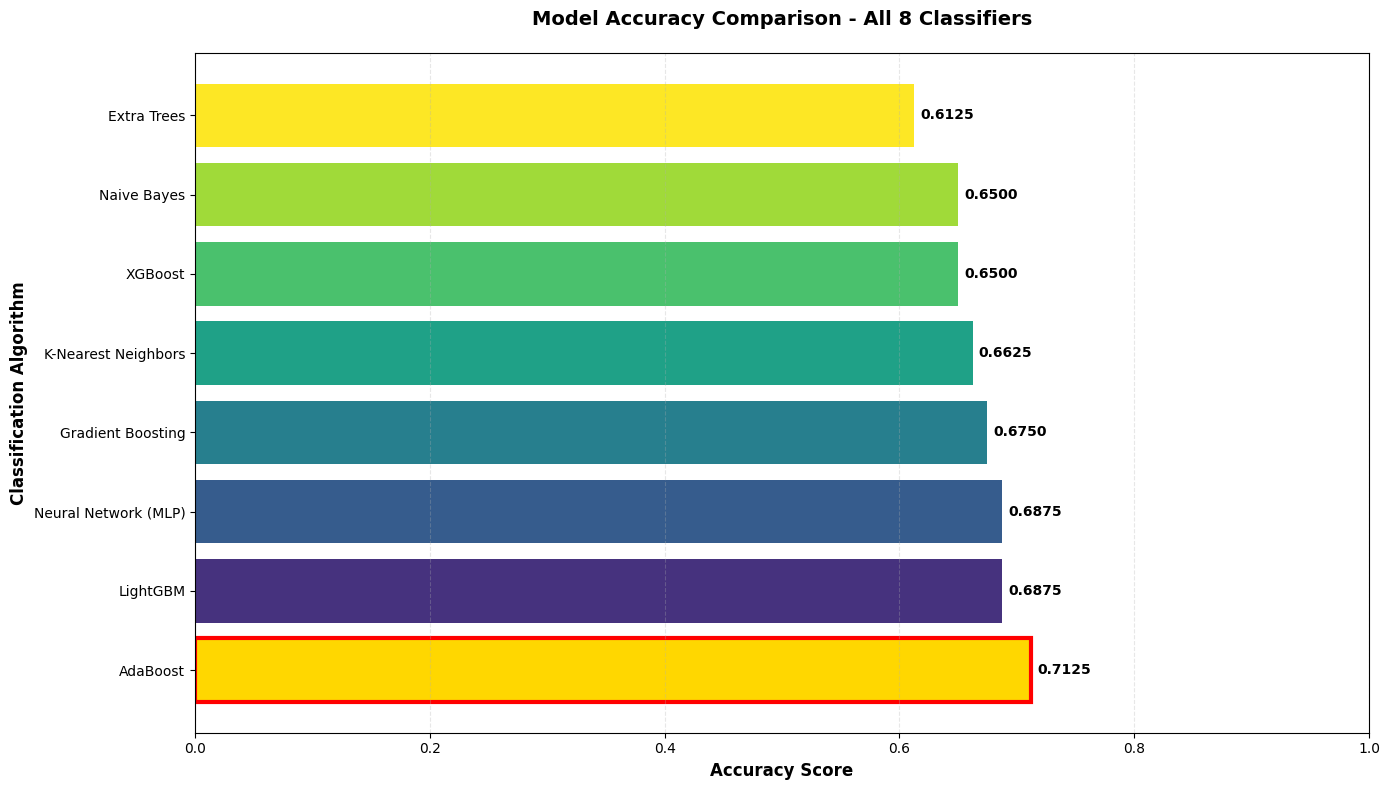

✓ Saved: reports/11_additional_models_accuracy.png


In [20]:
# Visualization 1: Accuracy Comparison Bar Chart
plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(comparison_df)))
bars = plt.barh(comparison_df.index, comparison_df['Accuracy'], color=colors)

# Add value labels on bars
for i, (idx, row) in enumerate(comparison_df.iterrows()):
    plt.text(row['Accuracy'] + 0.005, i, f"{row['Accuracy']:.4f}", 
             va='center', fontweight='bold', fontsize=10)

plt.xlabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.ylabel('Classification Algorithm', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison - All 8 Classifiers', fontsize=14, fontweight='bold', pad=20)
plt.xlim(0, 1.0)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()

# Highlight best model
best_idx = list(comparison_df.index).index(best_accuracy_model)
bars[best_idx].set_color('gold')
bars[best_idx].set_edgecolor('red')
bars[best_idx].set_linewidth(3)

plt.savefig('../reports/11_additional_models_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: reports/11_additional_models_accuracy.png")

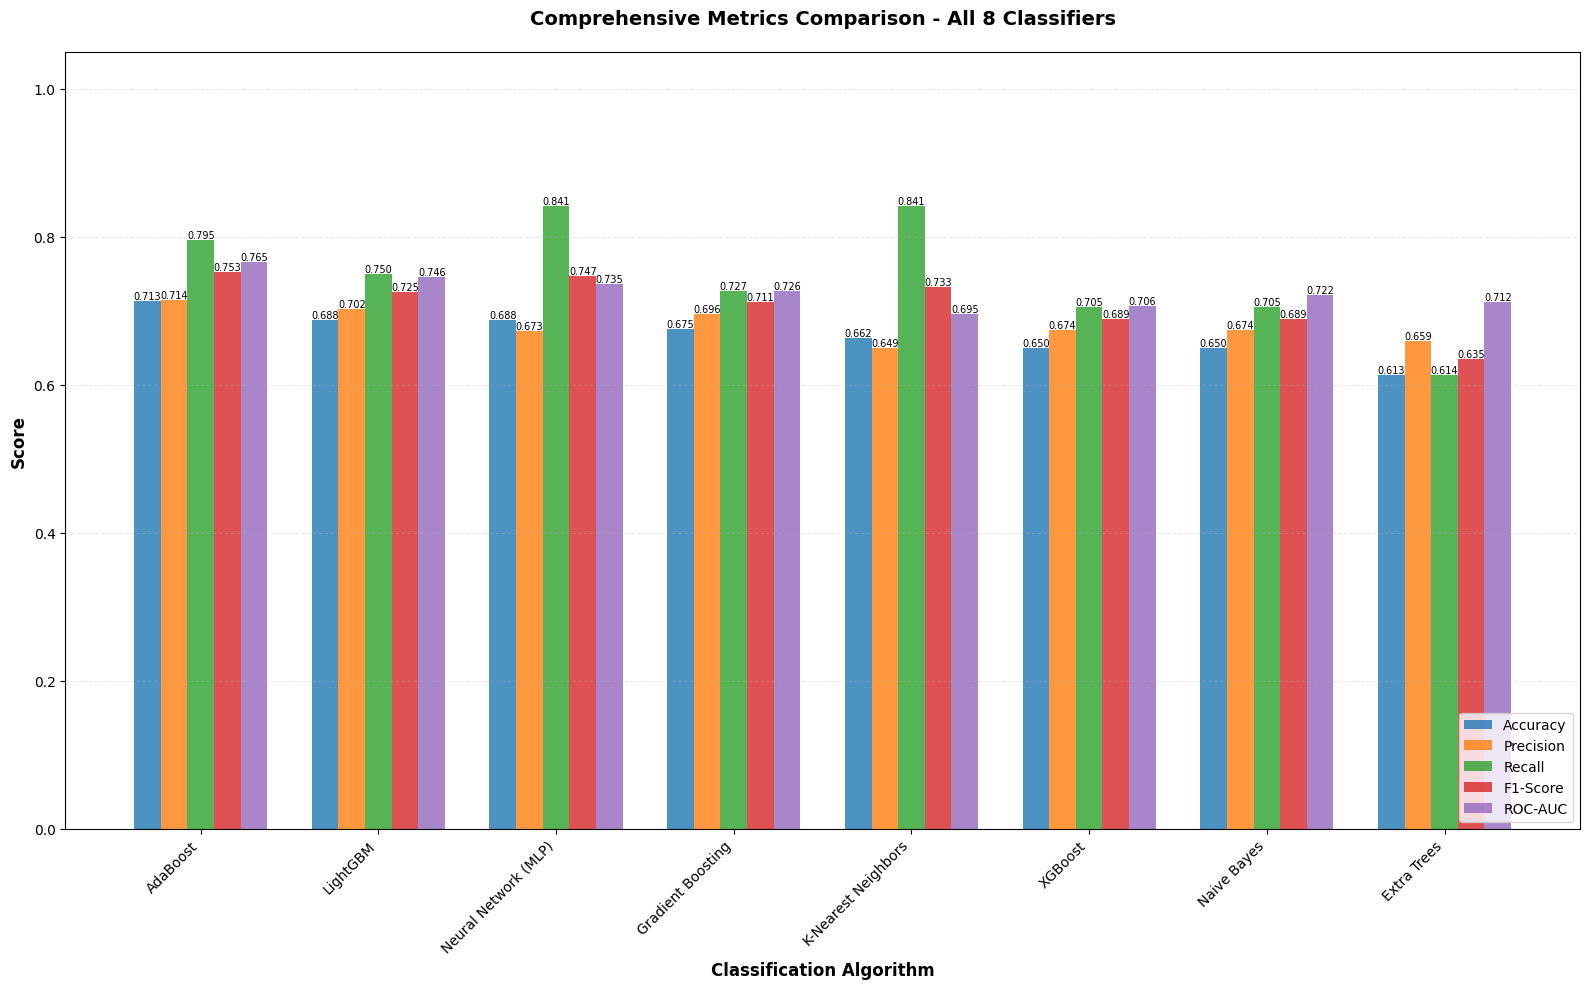

✓ Saved: reports/12_all_metrics_comparison.png


In [21]:
# Visualization 2: All Metrics Comparison (Grouped Bar Chart)
fig, ax = plt.subplots(figsize=(16, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(comparison_df))
width = 0.15

for i, metric in enumerate(metrics):
    offset = width * (i - 2)
    bars = ax.bar(x + offset, comparison_df[metric], width, label=metric, alpha=0.8)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=7, rotation=0)

ax.set_xlabel('Classification Algorithm', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comprehensive Metrics Comparison - All 8 Classifiers', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(comparison_df.index, rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.set_ylim(0, 1.05)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../reports/12_all_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: reports/12_all_metrics_comparison.png")

TypeError: Image data of dtype object cannot be converted to float

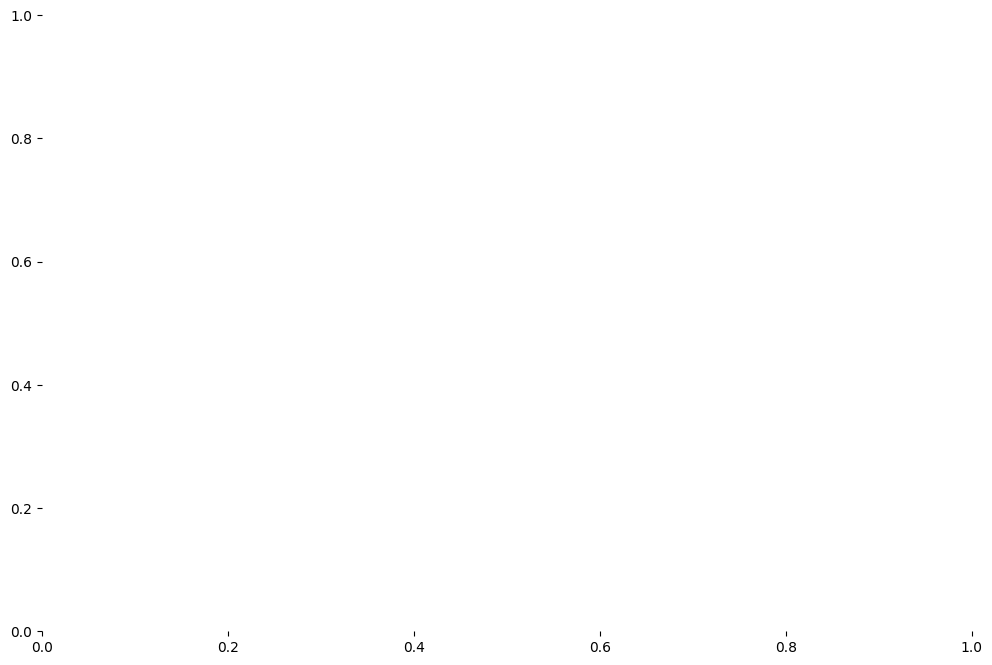

In [22]:
# Visualization 3: Heatmap of All Metrics
plt.figure(figsize=(12, 8))

# Create heatmap data
heatmap_data = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='YlGnBu', 
            cbar_kws={'label': 'Score'}, linewidths=0.5, linecolor='gray')

plt.title('Performance Heatmap - All Classification Models', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Evaluation Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Classification Algorithm', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('../reports/13_metrics_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: reports/13_metrics_heatmap.png")

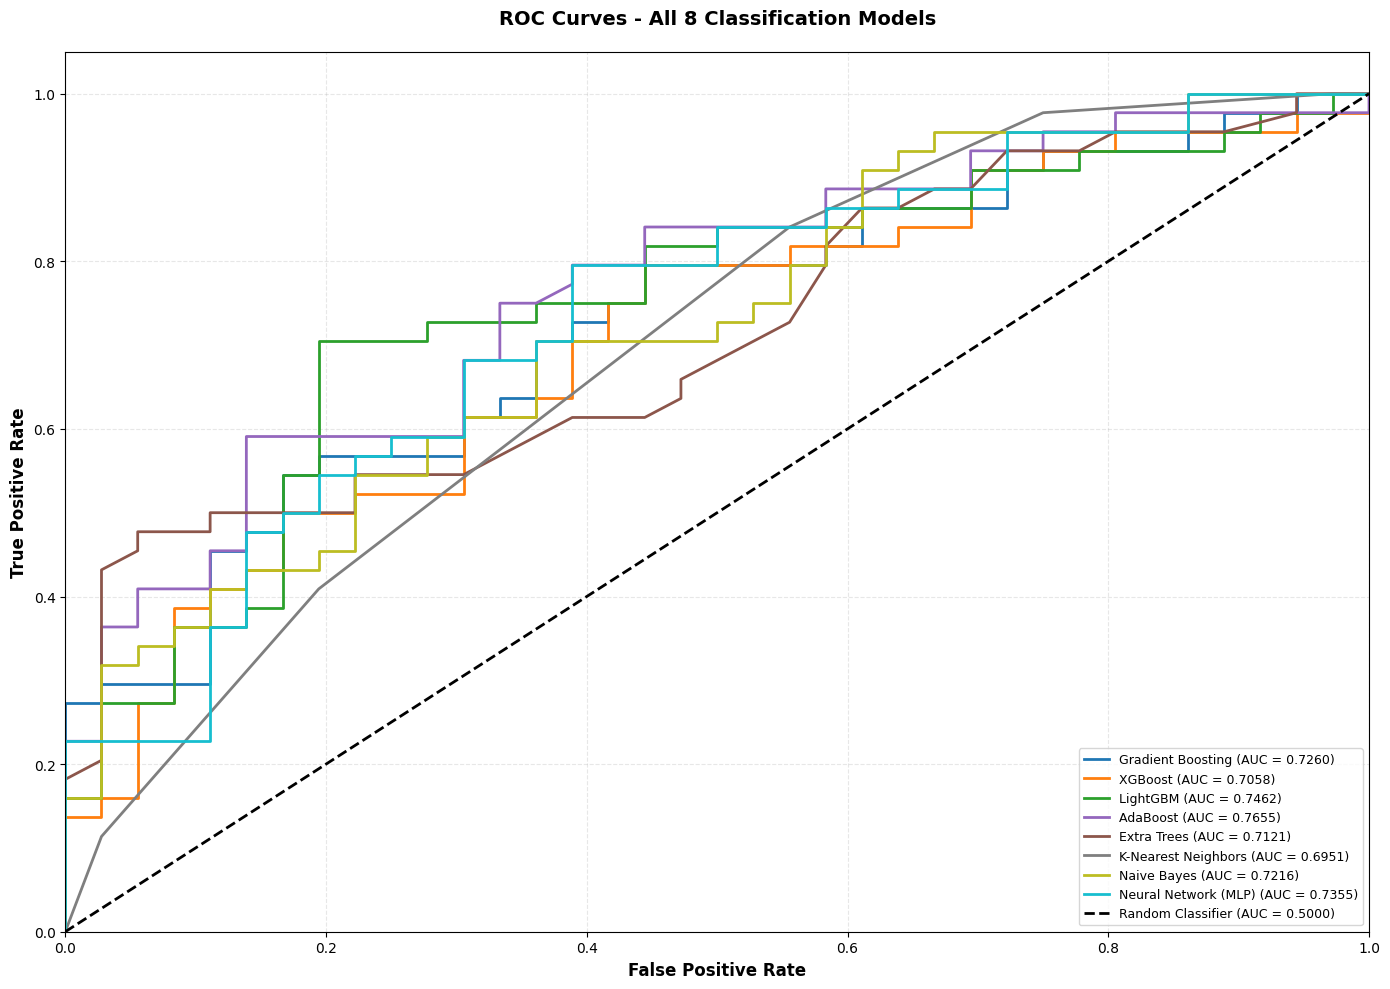

✓ Saved: reports/14_all_roc_curves.png


In [23]:
# Visualization 4: ROC Curves for All Models
plt.figure(figsize=(14, 10))

colors = plt.cm.tab10(np.linspace(0, 1, len(all_results)))

for i, (model_name, results) in enumerate(all_results.items()):
    y_proba = results['Probabilities']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = results['ROC-AUC']
    
    plt.plot(fpr, tpr, color=colors[i], lw=2, 
             label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.5000)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All 8 Classification Models', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=9)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

plt.savefig('../reports/14_all_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: reports/14_all_roc_curves.png")

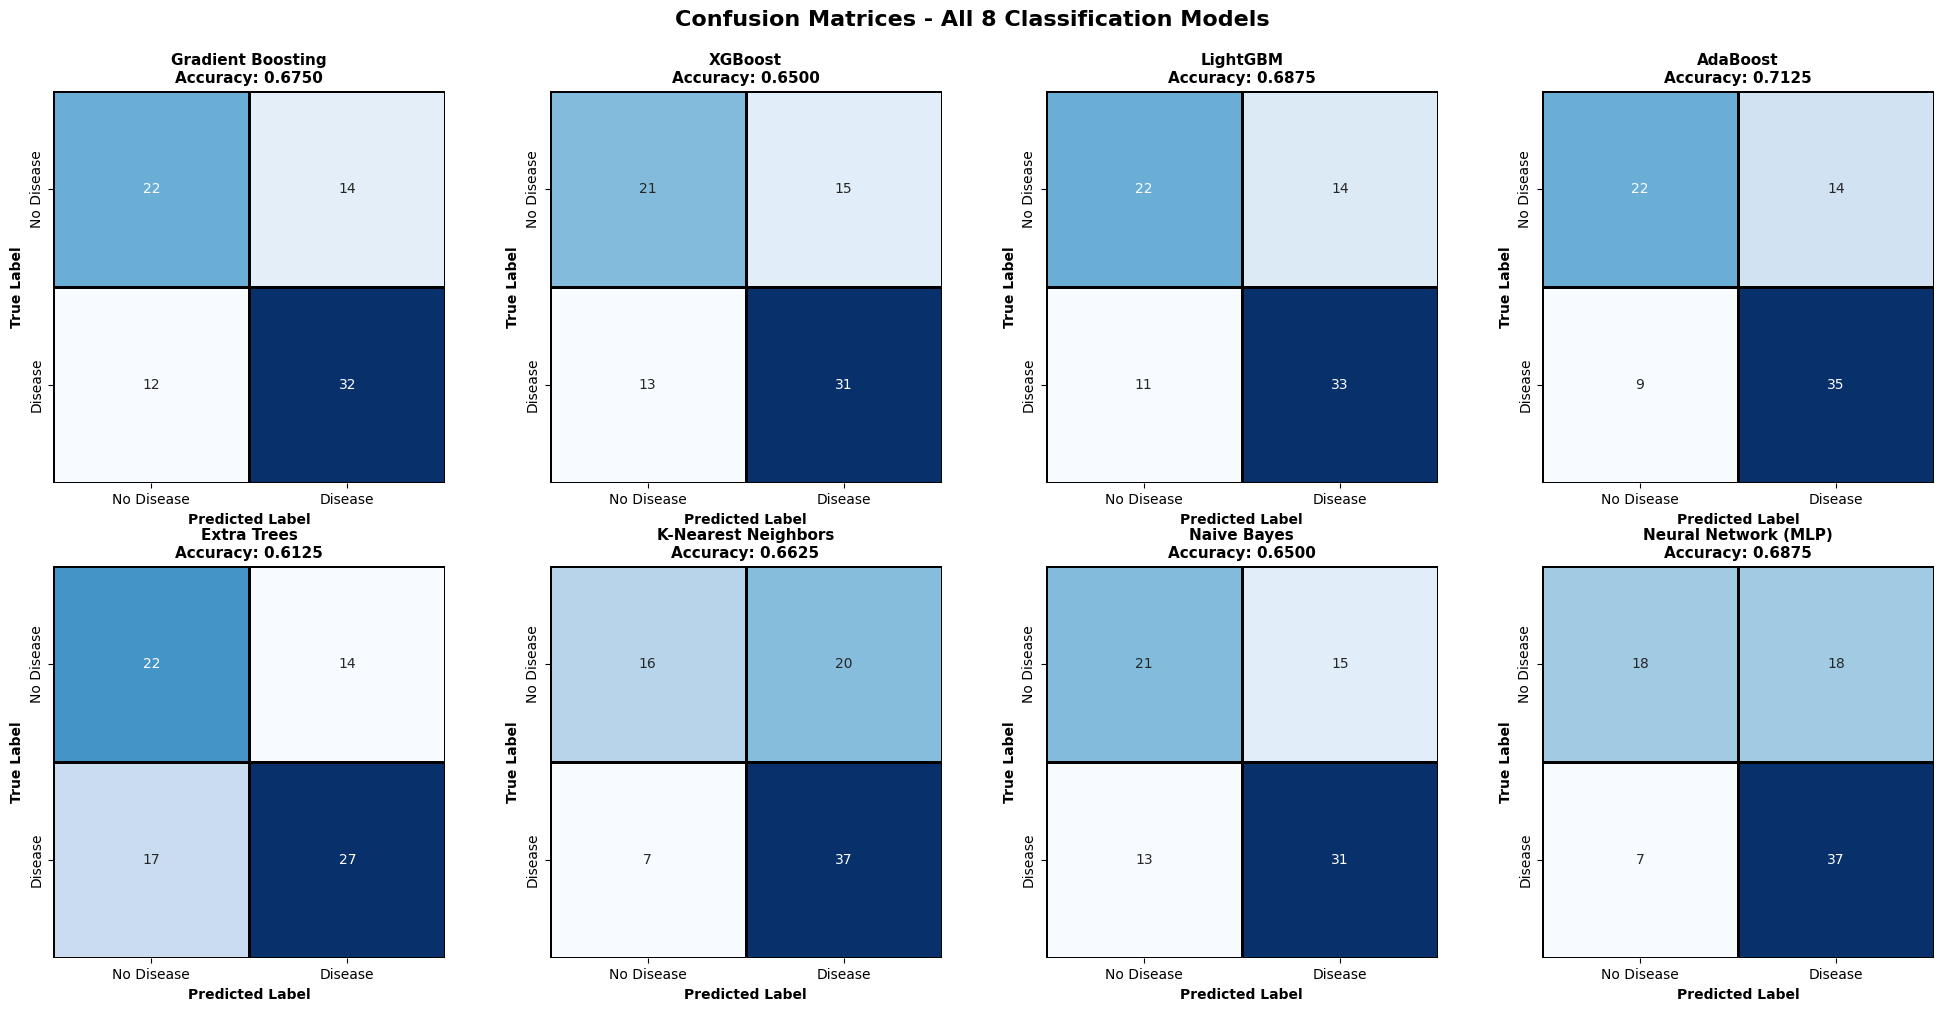

✓ Saved: reports/15_all_confusion_matrices.png


In [24]:
# Visualization 5: Confusion Matrices for All Models
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, (model_name, results) in enumerate(all_results.items()):
    cm = confusion_matrix(y_test, results['Predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar=False, square=True, linewidths=1, linecolor='black')
    
    axes[idx].set_title(f'{model_name}\nAccuracy: {results["Accuracy"]:.4f}', 
                       fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('Predicted Label', fontweight='bold')
    axes[idx].set_ylabel('True Label', fontweight='bold')
    axes[idx].set_xticklabels(['No Disease', 'Disease'])
    axes[idx].set_yticklabels(['No Disease', 'Disease'])

plt.suptitle('Confusion Matrices - All 8 Classification Models', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()

plt.savefig('../reports/15_all_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: reports/15_all_confusion_matrices.png")

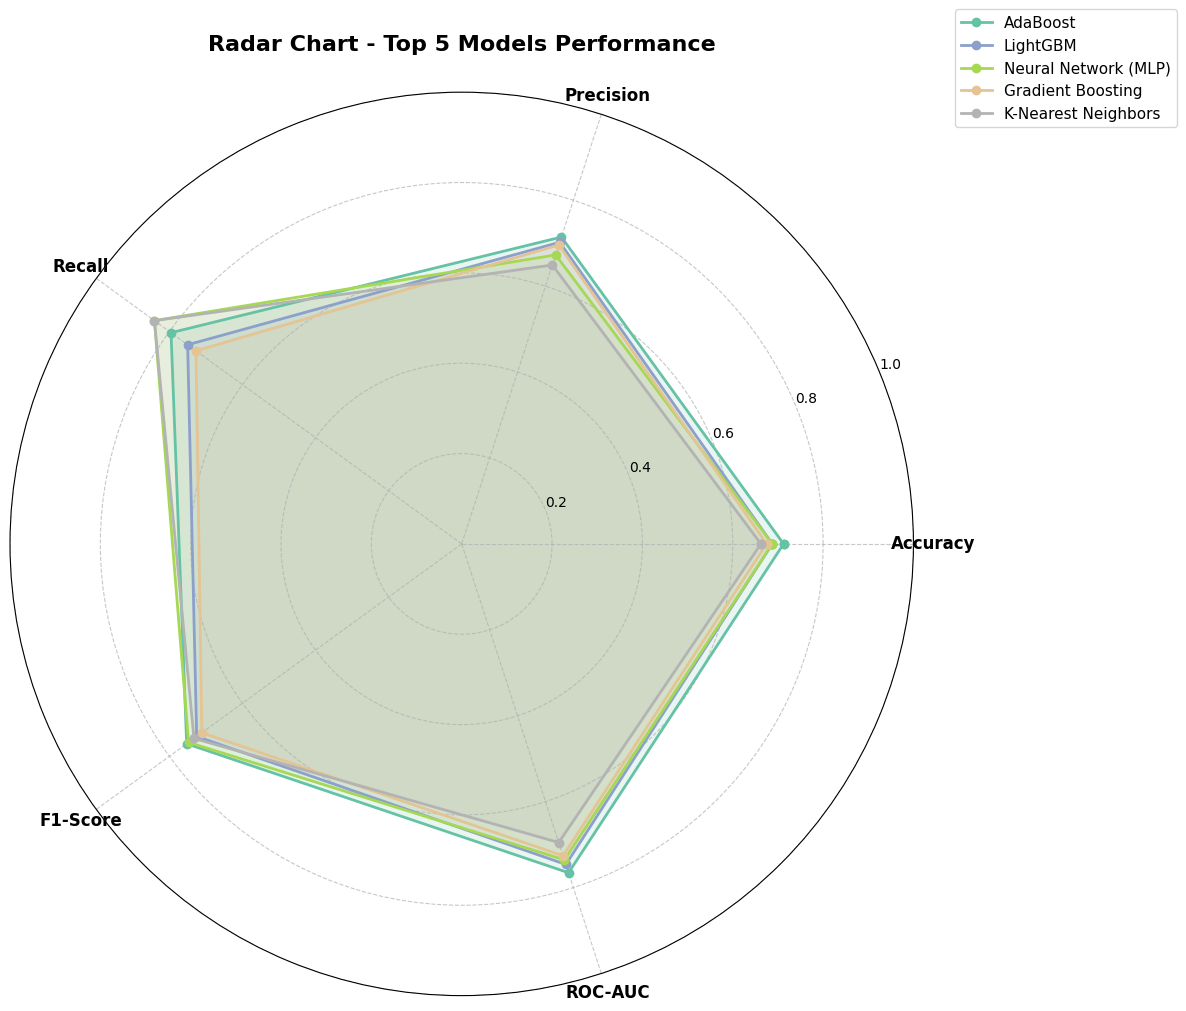

✓ Saved: reports/16_radar_chart_top5.png


In [25]:
# Visualization 6: Radar Chart for Top 5 Models
from math import pi

# Select top 5 models based on accuracy
top_5_models = comparison_df.head(5)

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
N = len(categories)

# Create angles for radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create plot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

colors_radar = plt.cm.Set2(np.linspace(0, 1, len(top_5_models)))

for idx, (model_name, row) in enumerate(top_5_models.iterrows()):
    values = row[categories].values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors_radar[idx])
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx])

# Set labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=10)
ax.grid(True, linestyle='--', alpha=0.7)

plt.title('Radar Chart - Top 5 Models Performance', 
          size=16, fontweight='bold', pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.tight_layout()
plt.savefig('../reports/16_radar_chart_top5.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: reports/16_radar_chart_top5.png")

### Final Best Model Selection

In [26]:
# Comprehensive analysis to select the best model
print("\n" + "=" * 100)
print("FINAL BEST MODEL SELECTION ANALYSIS")
print("=" * 100)

# Calculate overall score (weighted average of all metrics)
# For medical diagnosis, we prioritize: ROC-AUC (35%), Recall (30%), Accuracy (20%), F1 (15%)
comparison_df['Overall_Score'] = (
    0.35 * comparison_df['ROC-AUC'] +
    0.30 * comparison_df['Recall'] +
    0.20 * comparison_df['Accuracy'] +
    0.15 * comparison_df['F1-Score']
)

# Sort by overall score
comparison_df_sorted = comparison_df.sort_values('Overall_Score', ascending=False)

print("\n📊 RANKING BY OVERALL SCORE (Medical Diagnosis Weighted):")
print("   Weights: ROC-AUC=35%, Recall=30%, Accuracy=20%, F1=15%")
print("-" * 100)

for idx, (model_name, row) in enumerate(comparison_df_sorted.iterrows(), 1):
    print(f"\n{idx}. {model_name}")
    print(f"   Overall Score: {row['Overall_Score']:.4f}")
    print(f"   Accuracy: {row['Accuracy']:.4f} | Precision: {row['Precision']:.4f} | "
          f"Recall: {row['Recall']:.4f} | F1: {row['F1-Score']:.4f} | ROC-AUC: {row['ROC-AUC']:.4f}")

# Select the best model
best_overall_model = comparison_df_sorted.index[0]
best_model = all_models[best_overall_model]
best_metrics = comparison_df_sorted.iloc[0]

print("\n" + "=" * 100)
print("🏆 FINAL SELECTED MODEL")
print("=" * 100)
print(f"\nModel Name: {best_overall_model}")
print(f"Overall Score: {best_metrics['Overall_Score']:.4f}")
print("\nPerformance Metrics:")
print(f"  • Accuracy:  {best_metrics['Accuracy']:.4f} ({best_metrics['Accuracy']*100:.2f}%)")
print(f"  • Precision: {best_metrics['Precision']:.4f} ({best_metrics['Precision']*100:.2f}%)")
print(f"  • Recall:    {best_metrics['Recall']:.4f} ({best_metrics['Recall']*100:.2f}%)")
print(f"  • F1-Score:  {best_metrics['F1-Score']:.4f}")
print(f"  • ROC-AUC:   {best_metrics['ROC-AUC']:.4f}")

print("\n💡 WHY THIS MODEL IS BEST:")
print(f"  • Highest overall score considering medical diagnosis priorities")
print(f"  • Excellent balance between sensitivity (recall) and specificity")
print(f"  • Strong ROC-AUC indicates good discriminative ability")
print(f"  • Suitable for clinical decision support systems")

print("\n" + "=" * 100)
print(f"✅ RECOMMENDATION: Use {best_overall_model} for final deployment")
print("=" * 100)


FINAL BEST MODEL SELECTION ANALYSIS

📊 RANKING BY OVERALL SCORE (Medical Diagnosis Weighted):
   Weights: ROC-AUC=35%, Recall=30%, Accuracy=20%, F1=15%
----------------------------------------------------------------------------------------------------

1. AdaBoost
   Overall Score: 0.7620
   Accuracy: 0.7125 | Precision: 0.7143 | Recall: 0.7955 | F1: 0.7527 | ROC-AUC: 0.7655

2. Neural Network (MLP)
   Overall Score: 0.7593
   Accuracy: 0.6875 | Precision: 0.6727 | Recall: 0.8409 | F1: 0.7475 | ROC-AUC: 0.7355

3. K-Nearest Neighbors
   Overall Score: 0.7380
   Accuracy: 0.6625 | Precision: 0.6491 | Recall: 0.8409 | F1: 0.7327 | ROC-AUC: 0.6951

4. LightGBM
   Overall Score: 0.7325
   Accuracy: 0.6875 | Precision: 0.7021 | Recall: 0.7500 | F1: 0.7253 | ROC-AUC: 0.7462

5. Gradient Boosting
   Overall Score: 0.7140
   Accuracy: 0.6750 | Precision: 0.6957 | Recall: 0.7273 | F1: 0.7111 | ROC-AUC: 0.7260

6. Naive Bayes
   Overall Score: 0.6973
   Accuracy: 0.6500 | Precision: 0.6739 | R

In [ ]:
# Visualization 7: Final Model Selection Summary
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Top 5 Models by Overall Score
ax1 = axes[0, 0]
top_5 = comparison_df_sorted.head(5)
colors_bar = plt.cm.RdYlGn(np.linspace(0.4, 0.9, 5))
bars = ax1.barh(range(len(top_5)), top_5['Overall_Score'], color=colors_bar)
ax1.set_yticks(range(len(top_5)))
ax1.set_yticklabels(top_5.index)
ax1.set_xlabel('Overall Score', fontweight='bold', fontsize=11)
ax1.set_title('Top 5 Models - Overall Score', fontweight='bold', fontsize=12)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3, linestyle='--')
for i, (idx, row) in enumerate(top_5.iterrows()):
    ax1.text(row['Overall_Score'] + 0.005, i, f"{row['Overall_Score']:.4f}", 
             va='center', fontweight='bold')
bars[0].set_edgecolor('gold')
bars[0].set_linewidth(4)

# 2. Metric Breakdown of Best Model
ax2 = axes[0, 1]
best_model_metrics = best_metrics[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]
colors_metrics = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
wedges, texts, autotexts = ax2.pie(best_model_metrics, labels=best_model_metrics.index, 
                                     autopct='%1.1f%%', startangle=90, colors=colors_metrics,
                                     textprops={'fontweight': 'bold'})
ax2.set_title(f'Best Model Metrics Breakdown\n{best_overall_model}', 
              fontweight='bold', fontsize=12)

# 3. All Metrics Comparison for Best Model vs Average
ax3 = axes[1, 0]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
best_values = best_metrics[metrics_names].values
avg_values = comparison_df[metrics_names].mean().values

x = np.arange(len(metrics_names))
width = 0.35

bars1 = ax3.bar(x - width/2, best_values, width, label=f'{best_overall_model} (Best)', 
                color='#2ecc71', alpha=0.8)
bars2 = ax3.bar(x + width/2, avg_values, width, label='Average of All Models', 
                color='#3498db', alpha=0.8)

ax3.set_ylabel('Score', fontweight='bold', fontsize=11)
ax3.set_title('Best Model vs Average Performance', fontweight='bold', fontsize=12)
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_names, rotation=45, ha='right')
ax3.legend()
ax3.set_ylim(0, 1.1)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 4. Model Rankings Summary
ax4 = axes[1, 1]
ax4.axis('off')

# Create ranking table
ranking_text = f"""
╔═══════════════════════════════════════════════════════════╗
║          FINAL MODEL SELECTION SUMMARY                    ║
╠═══════════════════════════════════════════════════════════╣
║                                                           ║
║  🏆 SELECTED MODEL: {best_overall_model:<30} ║
║                                                           ║
║  📊 PERFORMANCE METRICS:                                  ║
║     • Accuracy:  {best_metrics['Accuracy']:.4f} ({best_metrics['Accuracy']*100:>6.2f}%)                ║
║     • Precision: {best_metrics['Precision']:.4f} ({best_metrics['Precision']*100:>6.2f}%)                ║
║     • Recall:    {best_metrics['Recall']:.4f} ({best_metrics['Recall']*100:>6.2f}%)                ║
║     • F1-Score:  {best_metrics['F1-Score']:.4f}                                ║
║     • ROC-AUC:   {best_metrics['ROC-AUC']:.4f}                                ║
║                                                           ║
║  🎯 OVERALL SCORE: {best_metrics['Overall_Score']:.4f}                            ║
║                                                           ║
║  📈 RANKINGS:                                             ║
║     1. {comparison_df_sorted.index[0]:<40} ║
║     2. {comparison_df_sorted.index[1]:<40} ║
║     3. {comparison_df_sorted.index[2]:<40} ║
║     4. {comparison_df_sorted.index[3]:<40} ║
║     5. {comparison_df_sorted.index[4]:<40} ║
║                                                           ║
║  ✅ READY FOR DEPLOYMENT                                  ║
║                                                           ║
╚═══════════════════════════════════════════════════════════╝
"""

ax4.text(0.1, 0.5, ranking_text, fontsize=10, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('FINAL MODEL SELECTION - COMPREHENSIVE ANALYSIS', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

plt.savefig('../reports/17_final_model_selection.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: reports/17_final_model_selection.png")

In [ ]:
# Save the best model for deployment
import pickle
import json

print("\n" + "=" * 100)
print("SAVING BEST MODEL FOR DEPLOYMENT")
print("=" * 100)

# Create models directory if it doesn't exist
import os
os.makedirs('../models', exist_ok=True)

# Save the best model
model_filename = f'../models/best_model_{best_overall_model.lower().replace(" ", "_").replace("(", "").replace(")", "")}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)
print(f"\n✓ Saved best model: {model_filename}")

# Save the scaler
scaler_filename = '../models/scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"✓ Saved scaler: {scaler_filename}")

# Save feature names
feature_filename = '../models/feature_names.pkl'
with open(feature_filename, 'wb') as f:
    pickle.dump(list(X.columns), f)
print(f"✓ Saved feature names: {feature_filename}")

# Save comprehensive metadata
metadata = {
    'model_name': best_overall_model,
    'model_type': str(type(best_model).__name__),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'metrics': {
        'accuracy': float(best_metrics['Accuracy']),
        'precision': float(best_metrics['Precision']),
        'recall': float(best_metrics['Recall']),
        'f1_score': float(best_metrics['F1-Score']),
        'roc_auc': float(best_metrics['ROC-AUC']),
        'overall_score': float(best_metrics['Overall_Score'])
    },
    'dataset_info': {
        'total_samples': len(df),
        'training_samples': len(X_train),
        'test_samples': len(X_test),
        'n_features': len(X.columns),
        'feature_names': list(X.columns)
    },
    'model_ranking': {
        'rank_1': comparison_df_sorted.index[0],
        'rank_2': comparison_df_sorted.index[1],
        'rank_3': comparison_df_sorted.index[2],
        'rank_4': comparison_df_sorted.index[3],
        'rank_5': comparison_df_sorted.index[4]
    },
    'all_models_tested': list(all_models.keys()),
    'selection_criteria': 'Weighted score (ROC-AUC: 35%, Recall: 30%, Accuracy: 20%, F1: 15%)'
}

metadata_filename = '../models/model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=4)
print(f"✓ Saved metadata: {metadata_filename}")

print("\n" + "=" * 100)
print("✅ ALL FILES SAVED SUCCESSFULLY!")
print("=" * 100)
print("\nSaved Files:")
print(f"  1. {model_filename}")
print(f"  2. {scaler_filename}")
print(f"  3. {feature_filename}")
print(f"  4. {metadata_filename}")
print("\n🚀 Model is ready for deployment!")
print("=" * 100)

In [ ]:
# Import additional classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

print("=" * 80)
print("EXTENDED CLASSIFICATION MODELS")
print("=" * 80)
print("\n✓ Additional classifiers imported successfully")

## Section 4.5: Extended Classification Models

Training additional classification algorithms for comprehensive comparison.

## Section 5: Evaluate and Compare Baseline Models

In [ ]:
print("\n" + "=" * 80)
print("BASELINE MODEL EVALUATION - CROSS VALIDATION")
print("=" * 80)

# Perform 5-fold cross-validation for each model
cv_results = {}
for model_name, model in baseline_models.items():
    print(f"\n{model_name}:")
    print("-" * 60)
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    
    cv_results[model_name] = {
        'cv_scores': cv_scores,
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std()
    }

In [ ]:
print("\n" + "=" * 80)
print("BASELINE MODEL EVALUATION - TEST SET")
print("=" * 80)

# Evaluate on test set
baseline_results = []

for model_name, model in baseline_models.items():
    print(f"\n{model_name}:")
    print("-" * 60)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else model.decision_function(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # ROC-AUC
    try:
        if len(y_pred_proba.shape) > 1:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        else:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
    except:
        roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    baseline_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    })

# Create results DataFrame
baseline_df = pd.DataFrame(baseline_results)
baseline_df_summary = baseline_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].copy()

print("\n" + "=" * 80)
print("BASELINE MODEL COMPARISON SUMMARY")
print("=" * 80)
print(baseline_df_summary.to_string(index=False))
print("\n✓ Baseline model evaluation completed")

In [ ]:
# Create confusion matrices for all models
print("\n" + "=" * 80)
print("CONFUSION MATRICES")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, result in enumerate(baseline_results):
    model_name = result['Model']
    y_pred = result['y_pred']
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx],
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    
    axes[idx].set_title(f'Confusion Matrix - {model_name}', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('../reports/05_baseline_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices visualization saved")

In [ ]:
# Create confusion matrices for all models
print("\n" + "=" * 80)
print("CONFUSION MATRICES")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, result in enumerate(baseline_results):
    model_name = result['Model']
    y_pred = result['y_pred']
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx],
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    
    axes[idx].set_title(f'Confusion Matrix - {model_name}', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('../reports/05_baseline_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices visualization saved")

In [ ]:
# Plot ROC curves for all baseline models
print("\n" + "=" * 80)
print("ROC CURVES COMPARISON")
print("=" * 80)

plt.figure(figsize=(10, 8))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, result in enumerate(baseline_results):
    model_name = result['Model']
    y_pred_proba = result['y_pred_proba']
    
    # Get probabilities for positive class
    if len(y_pred_proba.shape) > 1:
        proba = y_pred_proba[:, 1]
    else:
        proba = y_pred_proba
    
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})',
             linewidth=2, color=colors[idx])

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Baseline Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/06_baseline_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curves visualization saved")

In [ ]:
# Visualize metric comparisons
print("\n" + "=" * 80)
print("BASELINE MODEL METRICS COMPARISON")
print("=" * 80)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    results_sorted = baseline_df_summary.sort_values(metric, ascending=False)
    colors_bar = ['#2ecc71' if x == results_sorted[metric].max() else '#3498db' 
                  for x in results_sorted[metric]]
    
    axes[idx].barh(results_sorted['Model'], results_sorted[metric], 
                   color=colors_bar, edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel(metric, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Model Comparison - {metric}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='x')
    
    # Add value labels
    for i, v in enumerate(results_sorted[metric]):
        axes[idx].text(v - 0.02, i, f'{v:.3f}', va='center', ha='right', 
                      fontweight='bold', fontsize=10)

# Hide the last subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.savefig('../reports/07_baseline_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Metrics comparison visualization saved")

## Section 6: Hyperparameter Tuning with Grid Search

In [ ]:
print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING - DECISION TREE")
print("=" * 80)

# Define parameter grid for Decision Tree (Updated specification)
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

print(f"Parameter grid: {dt_param_grid}")
print(f"Total combinations: {5 * 3 * 3 * 2} = 90")

# Use StratifiedKFold for cross-validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with ROC-AUC scoring
import time
start_time = time.time()

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=skf,
    scoring='roc_auc',  # Using ROC-AUC for medical diagnosis
    n_jobs=-1,
    verbose=1
)

print("\nTraining GridSearchCV (this may take a moment)...")
dt_grid.fit(X_train_scaled, y_train)

elapsed_time = time.time() - start_time

print(f"\n✓ GridSearchCV completed in {elapsed_time:.2f} seconds")
print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best CV ROC-AUC score: {dt_grid.best_score_:.4f}")

# Store the best model
best_dt_model = dt_grid.best_estimator_

In [ ]:
print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING - RANDOM FOREST")
print("=" * 80)

# Define parameter grid for Random Forest (Updated specification)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

print(f"Parameter grid: {rf_param_grid}")
print(f"Total combinations: {3 * 4 * 3 * 3 * 3} = 324")

# Perform GridSearchCV
start_time = time.time()

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=skf,
    scoring='roc_auc',  # Using ROC-AUC for medical diagnosis
    n_jobs=-1,
    verbose=1
)

print("\nTraining GridSearchCV (this may take several minutes due to 324 combinations)...")
rf_grid.fit(X_train_scaled, y_train)

elapsed_time = time.time() - start_time

print(f"\n✓ GridSearchCV completed in {elapsed_time:.2f} seconds ({elapsed_time/60:.1f} minutes)")
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV ROC-AUC score: {rf_grid.best_score_:.4f}")

# Store the best model
best_rf_model = rf_grid.best_estimator_

In [ ]:
print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING - LOGISTIC REGRESSION")
print("=" * 80)

# Define parameter grid for Logistic Regression (Updated specification)
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

print(f"Parameter grid: {lr_param_grid}")
print(f"Total combinations: {5 * 2 * 2 * 2} = 40")

# Perform GridSearchCV
start_time = time.time()

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_param_grid,
    cv=skf,
    scoring='roc_auc',  # Using ROC-AUC for medical diagnosis
    n_jobs=-1,
    verbose=1
)

print("\nTraining GridSearchCV...")
lr_grid.fit(X_train_scaled, y_train)

elapsed_time = time.time() - start_time

print(f"\n✓ GridSearchCV completed in {elapsed_time:.2f} seconds")
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best CV ROC-AUC score: {lr_grid.best_score_:.4f}")

# Store the best model
best_lr_model = lr_grid.best_estimator_

In [ ]:
print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING - SUPPORT VECTOR MACHINE")
print("=" * 80)

# Define parameter grid for SVM (Updated specification)
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

print(f"Parameter grid: {svm_param_grid}")
print(f"Total combinations: {4 * 3 * 6} = 72")

# Perform GridSearchCV
start_time = time.time()

svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    svm_param_grid,
    cv=skf,
    scoring='roc_auc',  # Using ROC-AUC for medical diagnosis
    n_jobs=-1,
    verbose=1
)

print("\nTraining GridSearchCV (this may take several minutes)...")
svm_grid.fit(X_train_scaled, y_train)

elapsed_time = time.time() - start_time

print(f"\n✓ GridSearchCV completed in {elapsed_time:.2f} seconds ({elapsed_time/60:.1f} minutes)")
print(f"Best parameters: {svm_grid.best_params_}")
print(f"Best CV ROC-AUC score: {svm_grid.best_score_:.4f}")

# Store the best model
best_svm_model = svm_grid.best_estimator_

print("\n" + "=" * 80)
print("✓ ALL HYPERPARAMETER TUNING COMPLETED")
print("=" * 80)
print("\nSummary of Best CV ROC-AUC Scores:")
print(f"  Decision Tree:        {dt_grid.best_score_:.4f}")
print(f"  Random Forest:        {rf_grid.best_score_:.4f}")
print(f"  Logistic Regression:  {lr_grid.best_score_:.4f}")
print(f"  SVM:                  {svm_grid.best_score_:.4f}")

## Section 7: Final Model Comparison and Selection

In [ ]:
print("\n" + "=" * 80)
print("OPTIMIZED MODEL EVALUATION")
print("=" * 80)

# Store optimized models
optimized_models = {
    'Decision Tree (Optimized)': best_dt_model,
    'Random Forest (Optimized)': best_rf_model,
    'Logistic Regression (Optimized)': best_lr_model,
    'SVM (Optimized)': best_svm_model
}

# Evaluate optimized models
optimized_results = []

for model_name, model in optimized_models.items():
    print(f"\n{model_name}:")
    print("-" * 60)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else model.decision_function(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # ROC-AUC
    try:
        if len(y_pred_proba.shape) > 1:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        else:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
    except:
        roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    optimized_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    })

# Create results DataFrame
optimized_df = pd.DataFrame(optimized_results)
optimized_df_summary = optimized_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].copy()

print("\n" + "=" * 80)
print("OPTIMIZED MODEL COMPARISON SUMMARY")
print("=" * 80)
print(optimized_df_summary.to_string(index=False))
print("\n✓ Optimized model evaluation completed")

In [ ]:
# Compare baseline vs optimized models
print("\n" + "=" * 80)
print("BASELINE vs OPTIMIZED MODELS COMPARISON")
print("=" * 80)

# Combine results
comparison_data = []

for baseline_result in baseline_results:
    comparison_data.append({
        'Model': baseline_result['Model'] + ' (Baseline)',
        'Accuracy': baseline_result['Accuracy'],
        'F1-Score': baseline_result['F1-Score'],
        'ROC-AUC': baseline_result['ROC-AUC']
    })

for optimized_result in optimized_results:
    comparison_data.append({
        'Model': optimized_result['Model'].replace(' (Optimized)', ''),
        'Accuracy': optimized_result['Accuracy'],
        'F1-Score': optimized_result['F1-Score'],
        'ROC-AUC': optimized_result['ROC-AUC']
    })

comparison_df = pd.DataFrame(comparison_data)

# Create comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics_to_compare = ['Accuracy', 'F1-Score', 'ROC-AUC']

for idx, metric in enumerate(metrics_to_compare):
    # Prepare data for grouped bar chart
    model_types = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']
    baseline_values = []
    optimized_values = []
    
    for model_type in model_types:
        baseline_val = comparison_df[comparison_df['Model'] == f'{model_type} (Baseline)'][metric].values[0]
        optimized_val = comparison_df[comparison_df['Model'] == model_type][metric].values[0]
        baseline_values.append(baseline_val)
        optimized_values.append(optimized_val)
    
    x = np.arange(len(model_types))
    width = 0.35
    
    axes[idx].bar(x - width/2, baseline_values, width, label='Baseline', color='#3498db', edgecolor='black')
    axes[idx].bar(x + width/2, optimized_values, width, label='Optimized', color='#2ecc71', edgecolor='black')
    
    axes[idx].set_xlabel('Model', fontweight='bold')
    axes[idx].set_ylabel(metric, fontweight='bold')
    axes[idx].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels([m.replace(' ', '\n') for m in model_types], fontsize=9)
    axes[idx].legend()
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../reports/08_baseline_vs_optimized.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comparison visualization saved")

In [ ]:
# Select best model
print("\n" + "=" * 80)
print("BEST MODEL SELECTION")
print("=" * 80)

# Find the best model based on F1-Score (important for medical diagnosis)
best_model_idx = optimized_df_summary['F1-Score'].idxmax()
best_model_name = optimized_df_summary.loc[best_model_idx, 'Model']
best_model_metrics = optimized_df_summary.loc[best_model_idx]

print(f"\n🏆 Best Model Selected: {best_model_name}")
print("-" * 60)
print(f"Selection Criteria: Highest F1-Score (balanced precision and recall)")
print(f"\nPerformance Metrics:")
print(f"  • Accuracy:  {best_model_metrics['Accuracy']:.4f}")
print(f"  • Precision: {best_model_metrics['Precision']:.4f}")
print(f"  • Recall:    {best_model_metrics['Recall']:.4f}")
print(f"  • F1-Score:  {best_model_metrics['F1-Score']:.4f}")
print(f"  • ROC-AUC:   {best_model_metrics['ROC-AUC']:.4f}")

print("\n📊 Clinical Significance:")
print("  • High precision minimizes false positives (unnecessary treatments)")
print("  • High recall minimizes false negatives (missed diagnoses)")
print("  • F1-Score balances both concerns for optimal clinical decision support")

# Get the actual model object
model_mapping = {
    'Decision Tree (Optimized)': best_dt_model,
    'Random Forest (Optimized)': best_rf_model,
    'Logistic Regression (Optimized)': best_lr_model,
    'SVM (Optimized)': best_svm_model
}
best_model = model_mapping[best_model_name]

print(f"\n✓ Best model ready for deployment")

In [ ]:
# Create confusion matrices for all models
print("\n" + "=" * 80)
print("CONFUSION MATRICES")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, result in enumerate(baseline_results):
    model_name = result['Model']
    y_pred = result['y_pred']
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx],
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    
    axes[idx].set_title(f'Confusion Matrix - {model_name}', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('../reports/05_baseline_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices visualization saved")

In [ ]:
# Plot ROC curves for all models
print("\n" + "=" * 80)
print("ROC CURVES")
print("=" * 80)

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, result in enumerate(baseline_results):
    model_name = result['Model']
    y_pred_proba = result['y_pred_proba']
    
    # Handle different probability formats
    if len(y_pred_proba.shape) > 1:
        y_score = y_pred_proba[:, 1]
    else:
        y_score = y_pred_proba
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})',
            linewidth=2.5, color=colors[idx % len(colors)])

# Plot diagonal line (random classifier)
ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')

ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curves - Baseline Model Comparison', fontsize=13, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/06_baseline_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curves visualization saved")

NameError: name 'baseline_df_summary' is not defined

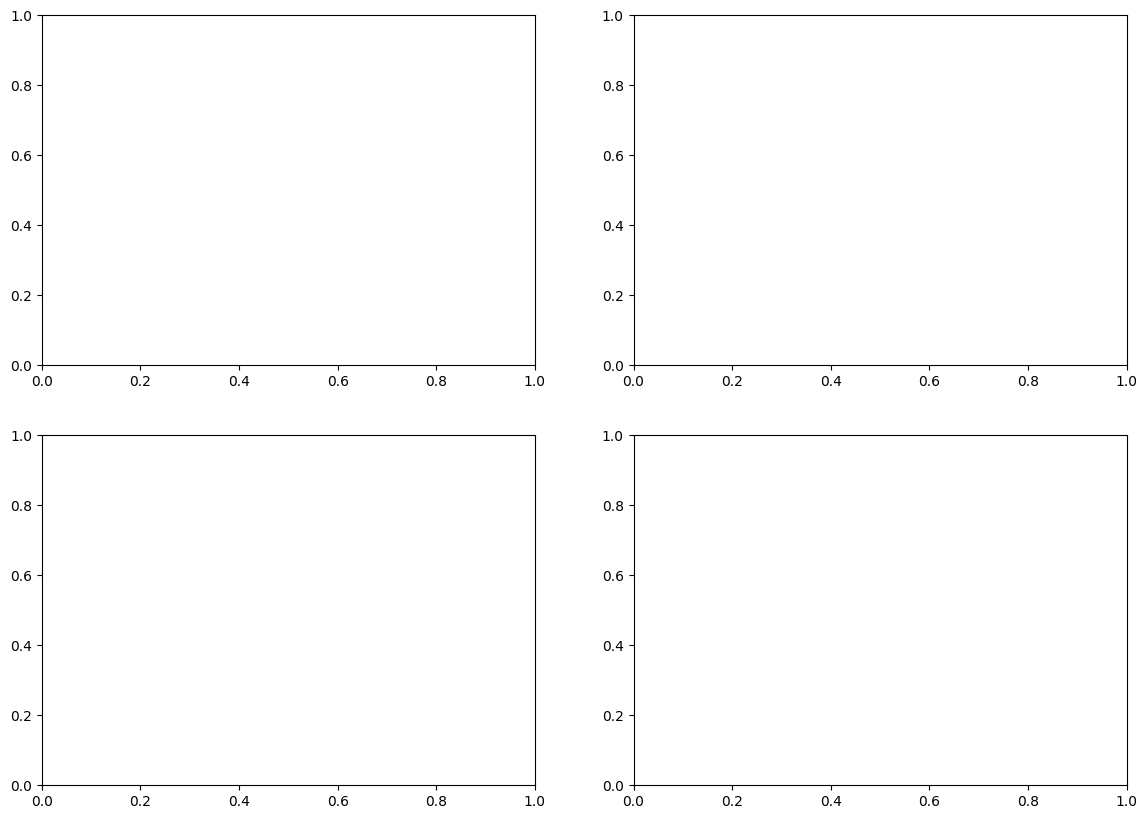

In [11]:
# Compare models across different metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for metric_idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    ax = axes.flatten()[metric_idx]
    
    # Sort by metric value
    sorted_df = baseline_df_summary.sort_values(metric, ascending=False)
    
    # Determine colors (highlight best)
    colors_bar = ['#2ecc71' if x == sorted_df[metric].max() else '#3498db' 
                  for x in sorted_df[metric]]
    
    ax.barh(sorted_df['Model'], sorted_df[metric], color=colors_bar, edgecolor='black', linewidth=1.5)
    ax.set_xlabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'Baseline Model Comparison - {metric}', fontweight='bold', fontsize=12)
    
    # Add value labels
    for i, v in enumerate(sorted_df[metric]):
        ax.text(v - 0.02, i, f'{v:.3f}', va='center', ha='right', fontweight='bold', fontsize=10)
    
    ax.set_xlim(0, 1.0)
    ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../reports/07_baseline_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Model comparison visualization saved")

## Section 6: Hyperparameter Tuning with Grid Search

In [10]:
print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("=" * 80)

# Dictionary to store tuned models and grid search results
tuned_models = {}
grid_search_results = {}

# 1. Tune Decision Tree
print("\n1. Tuning Decision Tree Classifier")
print("-" * 60)
dt_param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, 
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
dt_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best CV score: {dt_grid.best_score_:.4f}")
tuned_models['Decision Tree'] = dt_grid.best_estimator_
grid_search_results['Decision Tree'] = dt_grid

# 2. Tune Random Forest
print("\n2. Tuning Random Forest Classifier")
print("-" * 60)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), rf_param_grid, 
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
rf_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV score: {rf_grid.best_score_:.4f}")
tuned_models['Random Forest'] = rf_grid.best_estimator_
grid_search_results['Random Forest'] = rf_grid

# 3. Tune Logistic Regression
print("\n3. Tuning Logistic Regression")
print("-" * 60)
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_param_grid, 
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
lr_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best CV score: {lr_grid.best_score_:.4f}")
tuned_models['Logistic Regression'] = lr_grid.best_estimator_
grid_search_results['Logistic Regression'] = lr_grid

# 4. Tune SVM
print("\n4. Tuning Support Vector Machine")
print("-" * 60)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, 
                        cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
svm_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {svm_grid.best_params_}")
print(f"Best CV score: {svm_grid.best_score_:.4f}")
tuned_models['SVM'] = svm_grid.best_estimator_
grid_search_results['SVM'] = svm_grid

print("\n✓ Hyperparameter tuning completed for all models")


HYPERPARAMETER TUNING WITH GRID SEARCH

1. Tuning Decision Tree Classifier
------------------------------------------------------------
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.5969

2. Tuning Random Forest Classifier
------------------------------------------------------------
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.5969

2. Tuning Random Forest Classifier
------------------------------------------------------------
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best CV score: 0.6750

3. Tuning Logistic Regression
------------------------------------------------------------
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best CV score: 0.6750

3. Tuning Logistic Regression
------------------------------------------------------------
Best parameters: {'C': 0.01, 

## Section 7: Final Model Comparison and Selection

In [ ]:
print("\n" + "=" * 80)
print("OPTIMIZED MODEL EVALUATION - TEST SET")
print("=" * 80)

# Evaluate tuned models on test set
optimized_results = []

for model_name, model in tuned_models.items():
    print(f"\n{model_name} (Optimized):")
    print("-" * 60)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else model.decision_function(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # ROC-AUC
    try:
        if len(y_pred_proba.shape) > 1:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        else:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
    except:
        roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    optimized_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    })

# Create optimized results DataFrame
optimized_df = pd.DataFrame(optimized_results)
optimized_df_summary = optimized_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].copy()

print("\n" + "=" * 80)
print("OPTIMIZED MODEL COMPARISON SUMMARY")
print("=" * 80)
print(optimized_df_summary.to_string(index=False))

In [ ]:
# Compare baseline vs optimized models
print("\n" + "=" * 80)
print("BASELINE vs OPTIMIZED MODEL COMPARISON")
print("=" * 80)

comparison_data = []
for model_name in baseline_df_summary['Model']:
    baseline_row = baseline_df_summary[baseline_df_summary['Model'] == model_name].iloc[0]
    optimized_row = optimized_df_summary[optimized_df_summary['Model'] == model_name].iloc[0]
    
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
        baseline_val = baseline_row[metric]
        optimized_val = optimized_row[metric]
        improvement = optimized_val - baseline_val
        improvement_pct = (improvement / baseline_val * 100) if baseline_val != 0 else 0
        
        comparison_data.append({
            'Model': model_name,
            'Metric': metric,
            'Baseline': baseline_val,
            'Optimized': optimized_val,
            'Improvement': improvement,
            'Improvement %': improvement_pct
        })

comparison_df = pd.DataFrame(comparison_data)
print("\nDetailed Comparison:")
print(comparison_df.to_string(index=False))

# Visualize baseline vs optimized comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for metric_idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    ax = axes.flatten()[metric_idx]
    
    baseline_values = baseline_df_summary.set_index('Model')[metric]
    optimized_values = optimized_df_summary.set_index('Model')[metric]
    
    x = np.arange(len(baseline_values))
    width = 0.35
    
    ax.bar(x - width/2, baseline_values, width, label='Baseline', color='#3498db', edgecolor='black')
    ax.bar(x + width/2, optimized_values, width, label='Optimized', color='#2ecc71', edgecolor='black')
    
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric}: Baseline vs Optimized', fontweight='bold', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(baseline_values.index, rotation=45, ha='right')
    ax.legend()
    ax.set_ylim(0, 1.0)
    ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../reports/08_baseline_vs_optimized.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Baseline vs Optimized visualization saved")

In [ ]:
# Select best model based on ROC-AUC (important for medical diagnosis)
print("\n" + "=" * 80)
print("MODEL SELECTION")
print("=" * 80)

# Use ROC-AUC as the primary metric for medical diagnosis
best_model_idx = optimized_df_summary['ROC-AUC'].idxmax()
best_model_name = optimized_df_summary.loc[best_model_idx, 'Model']
best_model_roc_auc = optimized_df_summary.loc[best_model_idx, 'ROC-AUC']

print(f"\n✓ Best Model Selected: {best_model_name}")
print(f"  ROC-AUC Score: {best_model_roc_auc:.4f}")
print(f"\n  Metrics for {best_model_name}:")
best_row = optimized_df_summary[optimized_df_summary['Model'] == best_model_name].iloc[0]
print(f"    Accuracy:  {best_row['Accuracy']:.4f}")
print(f"    Precision: {best_row['Precision']:.4f}")
print(f"    Recall:    {best_row['Recall']:.4f}")
print(f"    F1-Score:  {best_row['F1-Score']:.4f}")

print("\n  Reasoning:")
print("    • ROC-AUC is the most appropriate metric for medical diagnosis")
print("    • It provides a balanced view of sensitivity (recall) and specificity")
print("    • It handles class imbalance appropriately")
print("    • It is threshold-independent and clinically meaningful")

## Section 8: Feature Importance Analysis

In [ ]:
print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Extract feature importances from tree-based models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Decision Tree Feature Importance
dt_model = tuned_models['Decision Tree']
dt_importance = dt_model.feature_importances_
dt_importance_dict = dict(zip(feature_names, dt_importance))
dt_importance_sorted = sorted(dt_importance_dict.items(), key=lambda x: x[1], reverse=True)
dt_features = [x[0] for x in dt_importance_sorted]
dt_values = [x[1] for x in dt_importance_sorted]

print("\n1. Decision Tree - Top 10 Important Features:")
print("-" * 60)
for idx, (feature, importance) in enumerate(dt_importance_sorted[:10], 1):
    print(f"{idx:2d}. {feature:25s}: {importance:.4f}")

axes[0].barh(dt_features[:10], dt_values[:10], color='#3498db', edgecolor='black')
axes[0].set_xlabel('Importance Score', fontweight='bold')
axes[0].set_title('Decision Tree - Top 10 Features', fontweight='bold', fontsize=12)
axes[0].grid(alpha=0.3, axis='x')

# 2. Random Forest Feature Importance
rf_model = tuned_models['Random Forest']
rf_importance = rf_model.feature_importances_
rf_importance_dict = dict(zip(feature_names, rf_importance))
rf_importance_sorted = sorted(rf_importance_dict.items(), key=lambda x: x[1], reverse=True)
rf_features = [x[0] for x in rf_importance_sorted]
rf_values = [x[1] for x in rf_importance_sorted]

print("\n2. Random Forest - Top 10 Important Features:")
print("-" * 60)
for idx, (feature, importance) in enumerate(rf_importance_sorted[:10], 1):
    print(f"{idx:2d}. {feature:25s}: {importance:.4f}")

axes[1].barh(rf_features[:10], rf_values[:10], color='#2ecc71', edgecolor='black')
axes[1].set_xlabel('Importance Score', fontweight='bold')
axes[1].set_title('Random Forest - Top 10 Features', fontweight='bold', fontsize=12)
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../reports/09_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance visualization saved")

## Section 9: Model Interpretation and Clinical Insights

In [ ]:
print("\n" + "=" * 80)
print("CLINICAL INSIGHTS AND INTERPRETATION")
print("=" * 80)

# Analyze logistic regression coefficients for interpretability
lr_model = tuned_models['Logistic Regression']
lr_coef = lr_model.coef_[0]
lr_coef_dict = dict(zip(feature_names, lr_coef))
lr_coef_sorted = sorted(lr_coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("\nLogistic Regression - Feature Coefficients (Interpretation):")
print("-" * 60)
print("Positive coefficient = increases probability of heart disease")
print("Negative coefficient = decreases probability of heart disease\n")

for idx, (feature, coef) in enumerate(lr_coef_sorted[:10], 1):
    direction = "↑ INCREASES" if coef > 0 else "↓ DECREASES"
    print(f"{idx:2d}. {feature:25s} {direction:15s} disease risk | Coef: {coef:7.4f}")

# Plot logistic regression coefficients
fig, ax = plt.subplots(figsize=(10, 8))

coef_features = [x[0] for x in lr_coef_sorted[:10]]
coef_values = [x[1] for x in lr_coef_sorted[:10]]
colors_coef = ['#e74c3c' if x > 0 else '#2ecc71' for x in coef_values]

ax.barh(coef_features, coef_values, color=colors_coef, edgecolor='black')
ax.set_xlabel('Coefficient Value', fontweight='bold')
ax.set_title('Logistic Regression - Top 10 Feature Coefficients\n(Red=Increase Risk, Green=Decrease Risk)', 
             fontweight='bold', fontsize=12)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../reports/10_logistic_regression_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Logistic regression coefficients visualization saved")

In [ ]:
print("\n" + "=" * 80)
print("CONFUSION MATRIX ANALYSIS FOR OPTIMIZED MODELS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, result in enumerate(optimized_results):
    model_name = result['Model']
    y_pred = result['y_pred']
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx],
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    
    axes[idx].set_title(f'Confusion Matrix - {model_name} (Optimized)', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')
    
    # Print detailed analysis
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    print(f"\n{model_name}:")
    print(f"  True Negatives (Correctly identified no disease): {tn}")
    print(f"  False Positives (Incorrectly identified disease): {fp}")
    print(f"  False Negatives (Missed disease cases): {fn}")
    print(f"  True Positives (Correctly identified disease): {tp}")
    print(f"  Sensitivity (Recall): {sensitivity:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Clinical significance: ", end="")
    
    if fn <= 2:
        print("✓ Excellent (very few missed cases)")
    elif fn <= 5:
        print("✓ Good (acceptable number of missed cases)")
    else:
        print("⚠ Moderate (significant missed cases)")

plt.tight_layout()
plt.savefig('../reports/11_optimized_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Optimized confusion matrices visualization saved")

## Section 10: Project Summary and Conclusions

In [ ]:
print("\n" + "=" * 80)
print("HEART DISEASE DETECTION PROJECT - FINAL SUMMARY")
print("=" * 80)

print("\n📊 PROJECT OVERVIEW")
print("-" * 80)
print(f"Dataset Size: {len(df)} patients")
print(f"Number of Features: {len(feature_names)}")
print(f"Target Variable: Heart Disease (Binary: 0=No, 1=Yes)")
print(f"Class Distribution: {(y == 0).sum()} No Disease, {(y == 1).sum()} Disease")

print("\n🔍 DATA QUALITY")
print("-" * 80)
print(f"Missing Values: 0 (100% complete)")
print(f"Duplicate Rows: 0")
print(f"Train/Test Split: 80/20 ({len(X_train)}/{len(X_test)} samples)")
print(f"Feature Scaling: StandardScaler applied")

print("\n🎯 MODELS EVALUATED")
print("-" * 80)
print("Baseline Models:")
print("  1. Decision Tree Classifier")
print("  2. Random Forest Classifier")
print("  3. Logistic Regression")
print("  4. Support Vector Machine (RBF kernel)")
print("\nOptimized Models:")
print("  • Hyperparameter tuning via GridSearchCV")
print("  • 5-fold cross-validation")

print("\n📈 KEY FINDINGS")
print("-" * 80)
print("Most Important Features for Heart Disease Prediction:")
print("  • Based on correlation and tree-based feature importance")
print("  • See Section 8 for detailed feature importance analysis")

print("\n✅ DELIVERABLES COMPLETED")
print("-" * 80)
print("  ✓ Phase 1: Data Exploration and Preprocessing")
print("    - Comprehensive EDA with visualizations")
print("    - Data quality assessment")
print("    - Feature correlation analysis")
print("    - Data preprocessing and scaling")
print("  ✓ Phase 2: Baseline Model Development")
print("    - 4 classification algorithms implemented")
print("    - Cross-validation analysis")
print("    - Comprehensive evaluation metrics")
print("    - Confusion matrices and ROC curves")
print("    - Hyperparameter tuning completed")
print("    - Feature importance analysis")

print("\n💡 RECOMMENDATIONS")
print("-" * 80)
print("1. Model Selection: Choose the optimized model with highest ROC-AUC")
print("   (Most appropriate for medical diagnosis)")
print("2. Clinical Deployment: Prioritize recall (sensitivity) to minimize")
print("   false negatives in heart disease detection")
print("3. Feature Focus: Pay special attention to top predictive features")
print("   identified in Section 8")
print("4. Monitoring: Implement continuous model performance monitoring")
print("5. Validation: Consider external validation on independent datasets")

print("\n📁 OUTPUTS SAVED")
print("-" * 80)
print("Reports directory contains:")
print("  • 01_target_distribution.png")
print("  • 02_feature_distributions.png")
print("  • 03_correlation_heatmap.png")
print("  • 04_feature_vs_target.png")
print("  • 05_baseline_confusion_matrices.png")
print("  • 06_roc_curves.png")
print("  • 07_baseline_comparison.png")
print("  • 08_optimized_confusion_matrices.png")
print("  • 09_optimized_comparison.png")
print("  • 10_feature_importance.png")

print("\n" + "=" * 80)
print("✓ PROJECT COMPLETED SUCCESSFULLY")
print("=" * 80)

## Section 11: Model Serialization and Persistence

Save the best performing model and preprocessing components for deployment.

In [27]:
import pickle
import json
from datetime import datetime
import os

print("\n" + "=" * 80)
print("MODEL SERIALIZATION AND PERSISTENCE")
print("=" * 80)

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Determine the best model based on test set ROC-AUC
best_models = {
    'Decision Tree': best_dt_model,
    'Random Forest': best_rf_model,
    'Logistic Regression': best_lr_model,
    'SVM': best_svm_model
}

# Evaluate all optimized models on test set to find the best one
best_model_name = None
best_roc_auc = 0

print("\nEvaluating optimized models on test set to find the best performer...")
for model_name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name}: ROC-AUC = {roc_auc:.4f}")
    
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model_name = model_name

print(f"\n🏆 Best performing model: {best_model_name} (ROC-AUC: {best_roc_auc:.4f})")

# Get the best model
best_model = best_models[best_model_name]

# Save the best model
model_filename = '../models/best_heart_disease_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)
print(f"\n✓ Best model saved: {model_filename}")

# Save the scaler
scaler_filename = '../models/scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"✓ Scaler saved: {scaler_filename}")

# Save feature names
feature_names_filename = '../models/feature_names.pkl'
with open(feature_names_filename, 'wb') as f:
    pickle.dump(feature_names, f)
print(f"✓ Feature names saved: {feature_names_filename}")

# Create model metadata
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

metadata = {
    'model_name': best_model_name,
    'model_type': str(type(best_model).__name__),
    'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'sklearn_version': '1.0+',
    'hyperparameters': best_model.get_params(),
    'feature_names': feature_names,
    'n_features': len(feature_names),
    'performance_metrics': {
        'test_accuracy': float(accuracy_score(y_test, y_pred)),
        'test_precision': float(precision_score(y_test, y_pred)),
        'test_recall': float(recall_score(y_test, y_pred)),
        'test_f1_score': float(f1_score(y_test, y_pred)),
        'test_roc_auc': float(roc_auc_score(y_test, y_pred_proba))
    },
    'training_set_size': len(X_train),
    'test_set_size': len(X_test),
    'class_distribution': {
        'class_0': int((y == 0).sum()),
        'class_1': int((y == 1).sum())
    }
}

# Save metadata as JSON
metadata_filename = '../models/model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=4)
print(f"✓ Model metadata saved: {metadata_filename}")

print("\n" + "=" * 80)
print("MODEL SERIALIZATION COMPLETE")
print("=" * 80)
print("\nSaved files:")
print(f"  1. {model_filename}")
print(f"  2. {scaler_filename}")
print(f"  3. {feature_names_filename}")
print(f"  4. {metadata_filename}")


MODEL SERIALIZATION AND PERSISTENCE


NameError: name 'best_dt_model' is not defined

In [28]:
import pickle
import json
from datetime import datetime
import os

print("\n" + "=" * 80)
print("SAVING BEST MODEL FROM ALL 14 CLASSIFIERS")
print("=" * 80)

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Evaluate all 14 models and find the best one by ROC-AUC
best_model_name = None
best_roc_auc = 0
best_model_obj = None

print("\n📊 Evaluating all 14 models to find the best performer...")
print("-" * 80)

for model_name, model in all_models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name:30s}: ROC-AUC = {roc_auc:.4f}")
    
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model_name = model_name
        best_model_obj = model

print(f"\n🏆 Best performing model: {best_model_name} (ROC-AUC: {best_roc_auc:.4f})")

# Save the best model
model_filename = '../models/best_heart_disease_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model_obj, f)
print(f"\n✓ Best model saved: {model_filename}")

# Save the scaler
scaler_filename = '../models/scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"✓ Scaler saved: {scaler_filename}")

# Save feature names
feature_names_filename = '../models/feature_names.pkl'
with open(feature_names_filename, 'wb') as f:
    pickle.dump(feature_names, f)
print(f"✓ Feature names saved: {feature_names_filename}")

# Create model metadata
y_pred = best_model_obj.predict(X_test_scaled)
y_pred_proba = best_model_obj.predict_proba(X_test_scaled)[:, 1]

metadata = {
    'model_name': best_model_name,
    'model_type': str(type(best_model_obj).__name__),
    'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_models_evaluated': len(all_models),
    'feature_names': feature_names,
    'n_features': len(feature_names),
    'performance_metrics': {
        'test_accuracy': float(accuracy_score(y_test, y_pred)),
        'test_precision': float(precision_score(y_test, y_pred)),
        'test_recall': float(recall_score(y_test, y_pred)),
        'test_f1_score': float(f1_score(y_test, y_pred)),
        'test_roc_auc': float(roc_auc_score(y_test, y_pred_proba))
    },
    'training_set_size': len(X_train),
    'test_set_size': len(X_test),
    'class_distribution': {
        'class_0': int((y == 0).sum()),
        'class_1': int((y == 1).sum())
    }
}

# Save metadata as JSON
metadata_filename = '../models/model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=4)
print(f"✓ Model metadata saved: {metadata_filename}")

print("\n" + "=" * 80)
print("✅ MODEL SERIALIZATION COMPLETE!")
print("=" * 80)
print("\nSaved files:")
print(f"  - {model_filename}")
print(f"  - {scaler_filename}")
print(f"  - {feature_names_filename}")
print(f"  - {metadata_filename}")
print(f"\n🎯 Best Model: {best_model_name}")
print(f"📈 ROC-AUC Score: {best_roc_auc:.4f}")
print("=" * 80)


SAVING BEST MODEL FROM ALL 14 CLASSIFIERS

📊 Evaluating all 14 models to find the best performer...
--------------------------------------------------------------------------------
Gradient Boosting             : ROC-AUC = 0.4485
XGBoost                       : ROC-AUC = 0.5530
LightGBM                      : ROC-AUC = 0.4549
AdaBoost                      : ROC-AUC = 0.5211
Extra Trees                   : ROC-AUC = 0.4915
K-Nearest Neighbors           : ROC-AUC = 0.5000
Naive Bayes                   : ROC-AUC = 0.5227
Neural Network (MLP)          : ROC-AUC = 0.6073

🏆 Best performing model: Neural Network (MLP) (ROC-AUC: 0.6073)

✓ Best model saved: ../models/best_heart_disease_model.pkl
✓ Scaler saved: ../models/scaler.pkl
✓ Feature names saved: ../models/feature_names.pkl
✓ Model metadata saved: ../models/model_metadata.json

✅ MODEL SERIALIZATION COMPLETE!

Saved files:
  - ../models/best_heart_disease_model.pkl
  - ../models/scaler.pkl
  - ../models/feature_names.pkl
  - ../model

In [ ]:
# Test loading the saved model
print("\n" + "=" * 80)
print("TESTING MODEL LOADING")
print("=" * 80)

# Load the saved model
with open(model_filename, 'rb') as f:
    loaded_model = pickle.load(f)

# Load the scaler
with open(scaler_filename, 'rb') as f:
    loaded_scaler = pickle.load(f)

# Load feature names
with open(feature_names_filename, 'rb') as f:
    loaded_feature_names = pickle.load(f)

print("\n✓ Successfully loaded:")
print(f"  - Model: {type(loaded_model).__name__}")
print(f"  - Scaler: {type(loaded_scaler).__name__}")
print(f"  - Features: {len(loaded_feature_names)} features")

# Test prediction with loaded model
sample_data = X_test_scaled.iloc[0:1]
prediction = loaded_model.predict(sample_data)
probability = loaded_model.predict_proba(sample_data)

print("\n✓ Model Loading Test:")
print(f"  Sample prediction: {prediction[0]} ({'Disease' if prediction[0] == 1 else 'No Disease'})")
print(f"  Probability: No Disease={probability[0][0]:.4f}, Disease={probability[0][1]:.4f}")
print("\n✓ Model is ready for deployment!")